Import libraries

Taken from website:-
https://ourworldindata.org/coronavirus-source-data

In [310]:
import pandas as pd
import numpy as np

Read files

In [311]:
# load datasets
train = pd.read_csv('/content/drive/MyDrive/owid-covid-data.csv')
train

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86665,ZWE,Africa,Zimbabwe,2021-05-03,38293.0,12.0,27.286,1573.0,3.0,1.857,2576.410,0.807,1.836,105.834,0.202,0.125,0.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1895.0,497878.0,33.498,0.127,1919.0,0.129,0.014,70.3,tests performed,537516.0,437751.0,99765.0,13317.0,17987.0,3.62,2.95,0.67,1210.0,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
86666,ZWE,Africa,Zimbabwe,2021-05-04,38327.0,34.0,23.286,1574.0,1.0,1.286,2578.698,2.288,1.567,105.901,0.067,0.087,0.86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1516.0,499394.0,33.600,0.102,1799.0,0.121,0.013,77.3,tests performed,559777.0,452191.0,107586.0,22261.0,17977.0,3.77,3.04,0.72,1210.0,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
86667,ZWE,Africa,Zimbabwe,2021-05-05,38357.0,30.0,23.714,1574.0,0.0,1.286,2580.716,2.018,1.596,105.901,0.000,0.087,0.86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2822.0,502216.0,33.790,0.190,1913.0,0.129,0.012,80.7,tests performed,576233.0,461023.0,115210.0,16456.0,16889.0,3.88,3.10,0.78,1136.0,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61

In [312]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [313]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86670 entries, 0 to 86669
Data columns (total 59 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   iso_code                               86670 non-null  object 
 1   continent                              82496 non-null  object 
 2   location                               86670 non-null  object 
 3   date                                   86670 non-null  object 
 4   total_cases                            84465 non-null  float64
 5   new_cases                              84463 non-null  float64
 6   new_cases_smoothed                     83462 non-null  float64
 7   total_deaths                           74745 non-null  float64
 8   new_deaths                             74903 non-null  float64
 9   new_deaths_smoothed                    83462 non-null  float64
 10  total_cases_per_million                84009 non-null  float64
 11  ne

Convert date to number

In [314]:
import datetime 

date = train.date

train['date'] = pd.to_datetime(train['date'], errors='coerce')
train['date_num'] = train['date'].dt.strftime('%d%m%Y')
train

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,24022020
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,25022020
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,26022020
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,27022020
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,28022020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86665,ZWE,Africa,Zimbabwe,2021-05-03,38293.0,12.0,27.286,1573.0,3.0,1.857,2576.410,0.807,1.836,105.834,0.202,0.125,0.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1895.0,497878.0,33.498,0.127,1919.0,0.129,0.014,70.3,tests performed,537516.0,437751.0,99765.0,13317.0,17987.0,3.62,2.95,0.67,1210.0,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,03052021
86666,ZWE,Africa,Zimbabwe,2021-05-04,38327.0,34.0,23.286,1574.0,1.0,1.286,2578.698,2.288,1.567,105.901,0.067,0.087,0.86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1516.0,499394.0,33.600,0.102,1799.0,0.121,0.013,77.3,tests performed,559777.0,452191.0,107586.0,22261.0,17977.0,3.77,3.04,0.72,1210.0,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,04052021
86667,ZWE,Africa,Zimbabwe,2021-05-05,38357.0,30.0,23.714,1574.0,0.0,1.286,2580.716,2.018,1.596,105.901,0.000,0.087,0.86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2822.0,502216.0,33.790,0.190,1913.0,0.129,0.012,80.7,tests performed,576233.0,461023.0,115210.0,16456.0,16889.0,3.88,3.10,0.78,1136.0,NaN,14862927

Country

In [315]:
country = train['location'].to_list()

# using naive method to remove duplicated from list  
list_country = [] 
for i in country: 
    if i not in list_country: 
        list_country.append(i) 

list_country

['Afghanistan',
 'Africa',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Anguilla',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Asia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czechia',
 'Democratic Republic of Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Europe',
 'European Union',
 'Faeroe Islands',
 'Falkland Islands',
 'Fiji',
 'Finland',
 'France',
 'Gabon'

In [316]:
print(len(list_country))

219


Get latest date

In [317]:
from datetime import date 
from datetime import timedelta

In [318]:
today = date.today() 
print("Today is: ", today) 

Today is:  2021-05-08


In [319]:
yesterday = today - timedelta(days = 1) 
print("Yesterday was: ", yesterday)

Yesterday was:  2021-05-07


In [320]:
last_date = train.date.max()
last_date

Timestamp('2021-05-07 00:00:00')

In [321]:
print(type(last_date))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [322]:
yesterday = pd.Timestamp(yesterday)

In [323]:
print(type(yesterday))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [324]:
if last_date == yesterday: 
    last_date = yesterday
elif last_date > yesterday: 
    last_date = yesterday 
else: 
    last_date = last_date
last_date


Timestamp('2021-05-07 00:00:00')

In [325]:
last_date = train[train.date == last_date]
last_date

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
438,AFG,Asia,Afghanistan,2021-05-07,61455.0,293.0,244.286,2673.0,9.0,6.857,1578.670,7.527,6.275,68.665,0.231,0.176,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.892834e+07,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.500,64.83,0.511,07052021
888,OWID_AFR,NaN,Africa,2021-05-07,4616997.0,8898.0,8471.143,123905.0,289.0,303.000,3443.983,6.637,6.319,92.425,0.216,0.226,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.974450e+07,13691299.0,5145124.0,163880.0,170468.0,1.47,1.02,0.38,127.0,NaN,1.340598e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,07052021
1326,ALB,Europe,Albania,2021-05-07,131577.0,67.0,70.286,2408.0,2.0,2.000,45721.384,23.282,24.423,836.750,0.695,0.695,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.856930e+05,NaN,NaN,13467.0,15541.0,20.35,NaN,NaN,5400.0,NaN,2.877800e+06,104.871,38.0,13.188,8.643,11803.431,1.1,304.195,10.08,7.100,51.200,NaN,2.890,78.57,0.795,07052021
1764,DZA,Africa,Algeria,2021-05-07,123692.0,219.0,226.286,3315.0,8.0,8.857,2820.731,4.994,5.160,75.597,0.182,0.202,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.385104e+07,17.348,29.1,6.211,3.857,13913.839,0.5,278.364,6.73,0.700,30.400,83.741,1.900,76.88,0.748,07052021
2196,AND,Europe,Andorra,2021-05-07,13390.0,27.0,22.571,127.0,0.0,0.286,173299.683,349.447,292.130,1643.694,0.000,3.698,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.726500e+04,163.755,NaN,NaN,NaN,NaN,NaN,109.135,7.97,29.000,37.800,NaN,NaN,83.73,0.868,07052021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84974,VNM,Asia,Vietnam,2021-05-07,3137.0,47.0,29.857,35.0,0.0,0.000,32.228,0.483,0.307,0.360,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.733858e+07,308.127,32.6,7.150,4.718,6171.884,2.0,245.465,6.00,1.000,45.900,85.847,2.600,75.40,0.704,07052021
85446,OWID_WRL,NaN,World,2021-05-07,156901680.0,831324.0,786028.571,3269856.0,13819.0,12827.714,20129.023,106.651,100.840,419.492,1.773,1.646,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.263381e+09,640353186.0,305302547.0,23324366.0,17778276.0,16.21,8.22,3.92,2281.0,NaN,7.794799e+09,58.045,30.9,8.696,5.355,15469.207,10.0,233.070,8.51,6.434,34.635,60.130,2.705,72.58,0.737,07052021
85839,YEM,Asia,Yemen,2021-05-07,6446.0,20.0,18.429,1269.0,4.0,6.143,216.120,0.671,0.618,42.547,0.134,0.206,NaN,NaN,NaN,NaN,NaN,NaN,N

Graphical representation

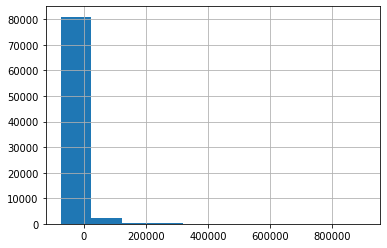

In [326]:
from matplotlib import pyplot as plt

train.new_cases.hist()

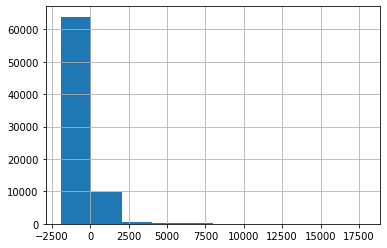

In [327]:
train.new_deaths.hist()

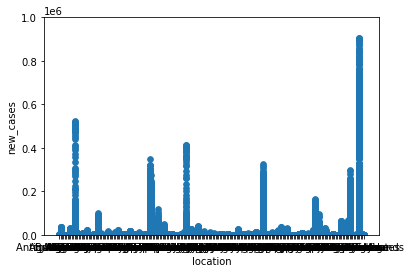

In [328]:
var = 'location'
data = pd.concat([train['new_cases'], train[var]], axis=1)
data.plot.scatter(x=var, y='new_cases', ylim=(0,1000000), s=32);

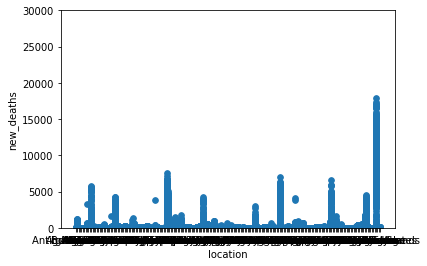

In [329]:
var = 'location'
data = pd.concat([train['new_deaths'], train[var]], axis=1)
data.plot.scatter(x=var, y='new_deaths', ylim=(0,30000), s=32);

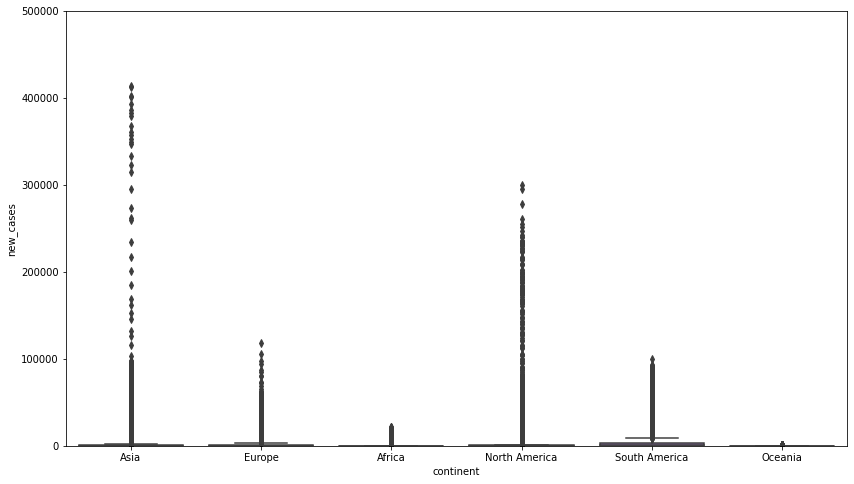

In [330]:
import seaborn as sns

var = 'continent'
data = pd.concat([train['new_cases'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(14, 8))
fig = sns.boxplot(x=var, y="new_cases", data=data)
fig.axis(ymin=0, ymax=500000);

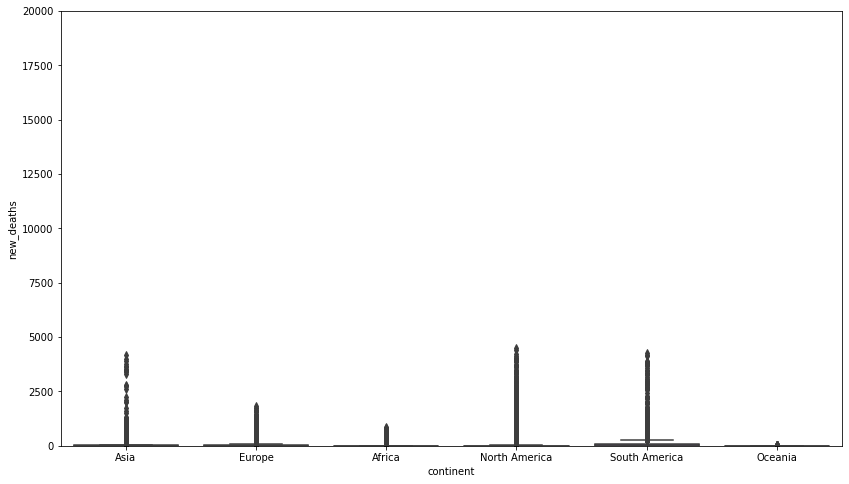

In [331]:
var = 'continent'
data = pd.concat([train['new_deaths'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(14, 8))
fig = sns.boxplot(x=var, y="new_deaths", data=data)
fig.axis(ymin=0, ymax=20000);

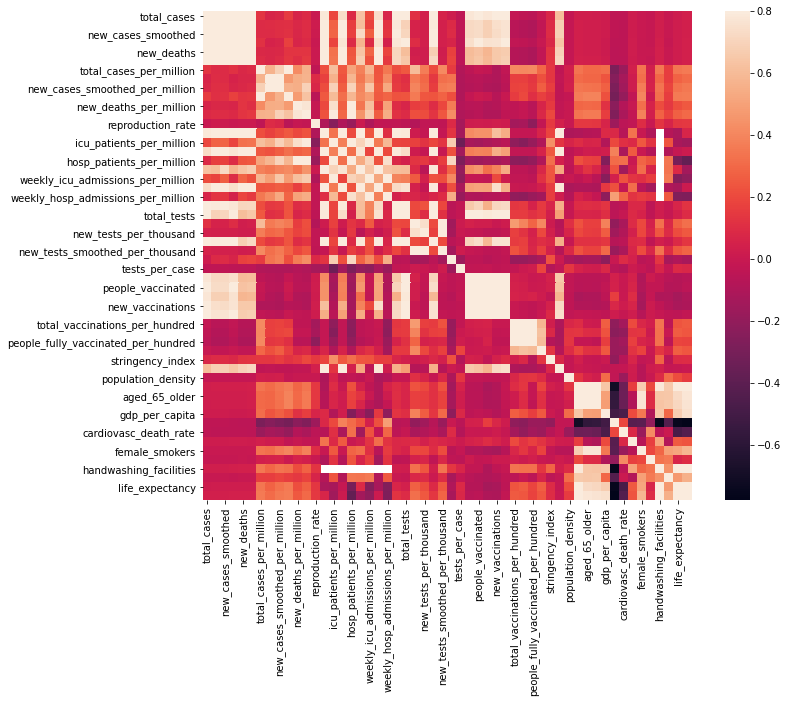

In [332]:
corrmat = train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

UK

In [333]:
country = "United Kingdom"

include_uk = train[train['location'].values == country]
exclude_uk = train[train['location'].values != country]
uk_cov19 = include_uk
uk_cov19

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
81702,GBR,Europe,United Kingdom,2020-01-31,2.0,2.0,NaN,NaN,NaN,NaN,0.029,0.029,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.932,31012020
81703,GBR,Europe,United Kingdom,2020-02-01,2.0,0.0,NaN,NaN,NaN,NaN,0.029,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.932,01022020
81704,GBR,Europe,United Kingdom,2020-02-02,2.0,0.0,NaN,NaN,NaN,NaN,0.029,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.932,02022020
81705,GBR,Europe,United Kingdom,2020-02-03,8.0,6.0,NaN,NaN,NaN,NaN,0.118,0.088,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.932,03022020
81706,GBR,Europe,United Kingdom,2020-02-04,8.0,0.0,NaN,NaN,NaN,NaN,0.118,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.932,04022020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82160,GBR,Europe,United Kingdom,2021-05-03,4437505.0,1674.0,2134.714,127797.0,1.0,15.571,65367.008,24.659,31.446,1882.524,0.015,0.229,0.86,187.0,2.755,1297.0,19.106,NaN,NaN,NaN,NaN,1069724.0,156093792.0,2299.352,15.758,971705.0,14.314,0.002,455.2,tests performed,50297911.0,34667904.0,15630007.0,200099.0,464646.0,74.09,51.07,23.02,6845.0,59.72,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.932,03052021
82161,GBR,Europe,United Kingdom,2021-05-04,4439489.0,1984.0,2032.857,127803.0,6.0,14.000,65396.234,29.225,29.945,1882.612,0.088,0.206,0.88,181.0,2.666,1289.0,18.988,NaN,NaN,NaN,NaN,860368.0,157088742.0,2314.008,12.674,998197.0,14.704,0.002,491.0,tests performed,50682567.0,34795074.0,15887493.0,384656.0,448798.0,74.66,51.26,23.40,6611.0,59.72,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.932,04052021
82162,GBR,Europe,United Kingdom,2021-05-05,4441644.0,2155.0,2036.286,127830.0,27.0,13.714,65427.978,31.744,29.996,18

Text(0, 0.5, 'uk_new_cases_per_million')

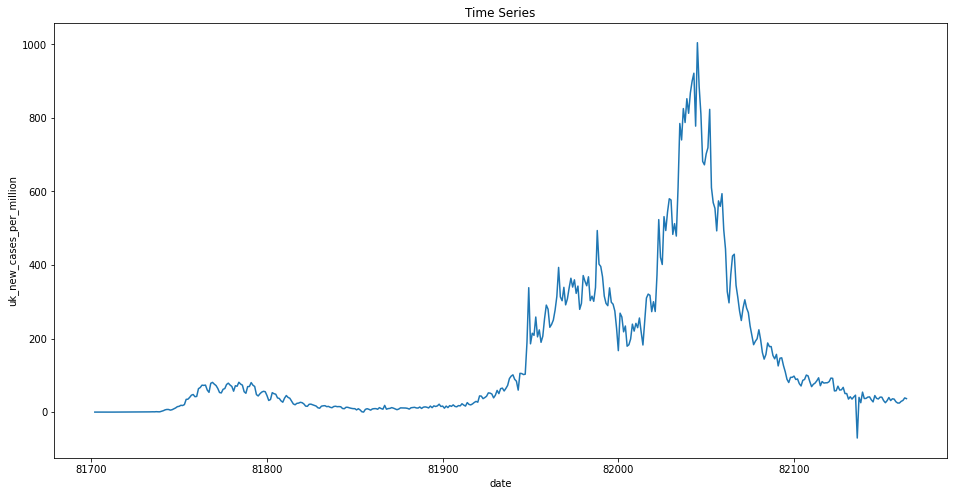

In [334]:
import matplotlib.pyplot as plt

uk_cov19['new_cases_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("uk_new_cases_per_million")

Text(0, 0.5, 'uk_new_deaths_per_million')

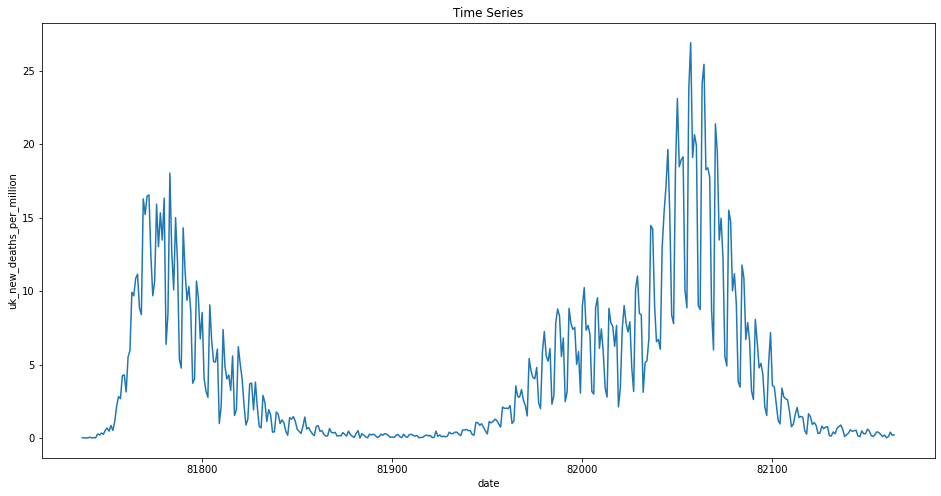

In [335]:
uk_cov19['new_deaths_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("uk_new_deaths_per_million")

US

In [336]:
country = "United States"

include_us = train[train['location'].values == country]
exclude_us = train[train['location'].values != country]
us_cov19 = include_us
us_cov19

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
82165,USA,North America,United States,2020-01-22,1.0,NaN,NaN,NaN,NaN,NaN,0.003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,22012020
82166,USA,North America,United States,2020-01-23,1.0,0.0,NaN,NaN,NaN,NaN,0.003,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,23012020
82167,USA,North America,United States,2020-01-24,2.0,1.0,NaN,NaN,NaN,NaN,0.006,0.003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,24012020
82168,USA,North America,United States,2020-01-25,2.0,0.0,NaN,NaN,NaN,NaN,0.006,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,25012020
82169,USA,North America,United States,2020-01-26,5.0,3.0,NaN,NaN,NaN,NaN,0.015,0.009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,26012020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82632,USA,North America,United States,2021-05-03,32472201.0,50560.0,49618.857,577566.0,483.0,670.429,98102.542,152.748,149.905,1744.898,1.459,2.025,0.87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,481328.0,421479493.0,1273.342,1.454,1037958.0,3.136,0.047,21.3,tests performed,246780203.0,147517734.0,105523520.0,1188734.0,2287393.0,73.79,44.11,31.55,6839.0,56.94,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,03052021
82633,USA,North America,United States,2021-05-04,32512934.0,40733.0,48172.714,578499.0,933.0,712.000,98225.601,123.059,145.536,1747.717,2.819,2.151,0.86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,433402.0,421912895.0,1274.651,1.309,881319.0,2.663,0.054,18.5,tests performed,247769049.0,147894671.0,106168588.0,988846.0,2194483.0,74.08,44.22,31.75,6562.0,56.94,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,04052021
82634,USA,North America,United States,2021-05-05,32557444.0,44510.0,46656.286,57

Text(0, 0.5, 'us_new_cases_per_million')

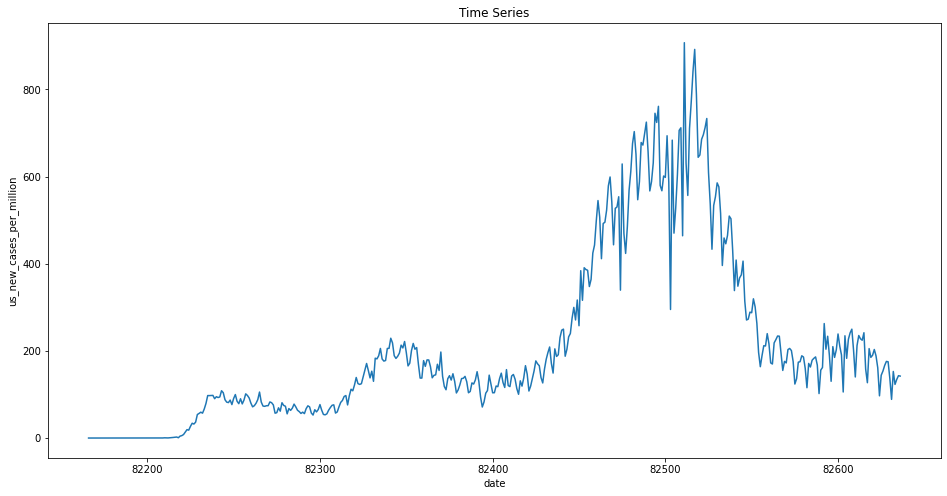

In [337]:
us_cov19['new_cases_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("us_new_cases_per_million")

Text(0, 0.5, 'us_new_deaths_per_million')

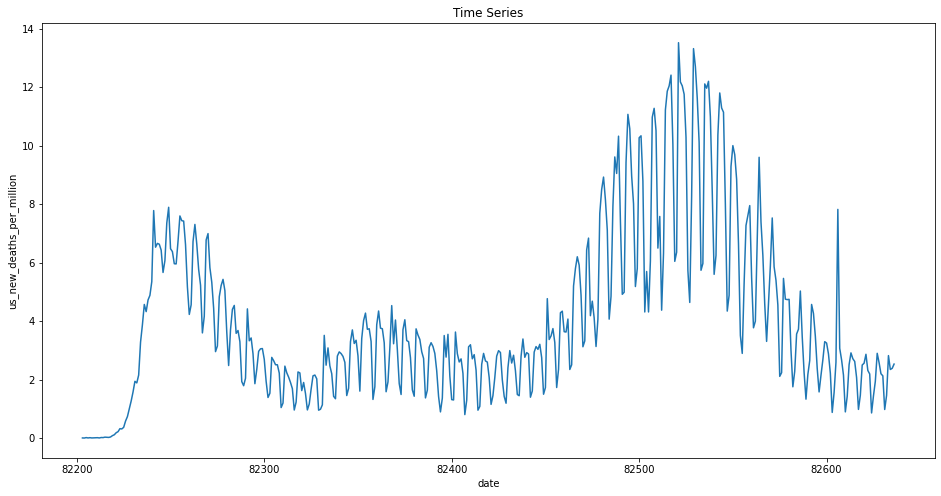

In [338]:
us_cov19['new_deaths_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("us_new_deaths_per_million")

France

In [339]:
country = "France"

include_fr = train[train['location'].values == country] 
exclude_fr = train[train['location'].values != country]
fr_cov19 = include_fr
fr_cov19

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
28322,FRA,Europe,France,2020-01-24,2.0,2.0,NaN,NaN,NaN,NaN,0.029,0.029,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,68147687.0,122.578,42.0,19.718,13.079,38605.671,NaN,86.06,4.77,30.1,35.6,NaN,5.98,82.66,0.901,24012020
28323,FRA,Europe,France,2020-01-25,3.0,1.0,NaN,NaN,NaN,NaN,0.044,0.015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,68147687.0,122.578,42.0,19.718,13.079,38605.671,NaN,86.06,4.77,30.1,35.6,NaN,5.98,82.66,0.901,25012020
28324,FRA,Europe,France,2020-01-26,3.0,0.0,NaN,NaN,NaN,NaN,0.044,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,68147687.0,122.578,42.0,19.718,13.079,38605.671,NaN,86.06,4.77,30.1,35.6,NaN,5.98,82.66,0.901,26012020
28325,FRA,Europe,France,2020-01-27,3.0,0.0,NaN,NaN,NaN,NaN,0.044,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,68147687.0,122.578,42.0,19.718,13.079,38605.671,NaN,86.06,4.77,30.1,35.6,NaN,5.98,82.66,0.901,27012020
28326,FRA,Europe,France,2020-01-28,4.0,1.0,NaN,NaN,NaN,NaN,0.059,0.015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,68147687.0,122.578,42.0,19.718,13.079,38605.671,NaN,86.06,4.77,30.1,35.6,NaN,5.98,82.66,0.901,28012020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28787,FRA,Europe,France,2021-05-03,5717160.0,3767.0,21725.714,105291.0,311.0,268.000,83893.676,55.277,318.803,1545.041,4.564,3.933,0.83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,479036.0,NaN,NaN,7.029,310009.0,4.549,0.069,14.5,people tested,22909701.0,16187686.0,6787880.0,427880.0,397313.0,33.62,23.75,9.96,5830.0,63.89,68147687.0,122.578,42.0,19.718,13.079,38605.671,NaN,86.06,4.77,30.1,35.6,NaN,5.98,82.66,0.901,03052021
28788,FRA,Europe,France,2021-05-04,5741537.0,24377.0,20876.286,105548.0,257.0,255.143,84251.385,357.708,306.339,1548.813,3.771,3.744,0.84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23430956.0,16490558.0,7014467.0,521255.0,405465.0,34.38,24.20,10.29,5950.0,63.89,68147687.0,122.578,42.0,19.718,13.079,38605.671,NaN,86.06,4.77,30.1,35.6,NaN,5.98,82.66,0.901,04052021
28789,FRA,Europe,France,2021-05-05,5767541.0,26004.0,20079.429,105792.0,244.0,245.000,84632.968,381.583,294.646,1552.393,3.580,3.595,0.84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23961377.0,16802584.0,7238760.0,530421.0,413883.0,35.16,24

Text(0, 0.5, 'france_new_cases_per_million')

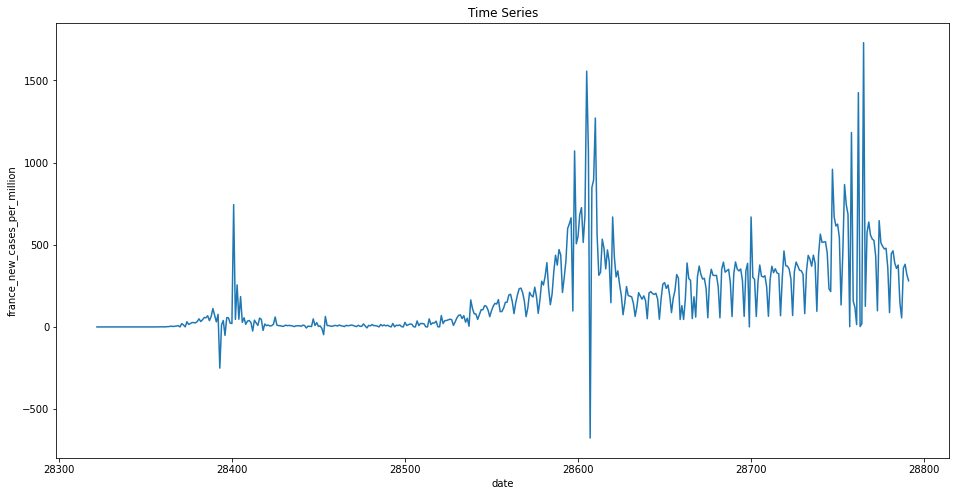

In [340]:
fr_cov19['new_cases_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("france_new_cases_per_million")

Text(0, 0.5, 'france_new_deaths_per_million')

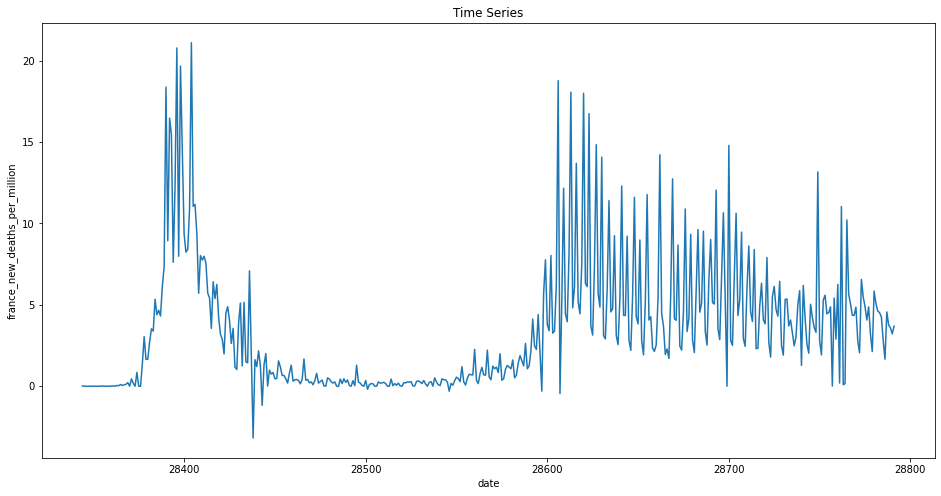

In [341]:
fr_cov19['new_deaths_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("france_new_deaths_per_million")

Italy

In [342]:
country = "Italy"

include_it = train[train['location'].values == country] 
exclude_it = train[train['location'].values != country]
it_cov19 = include_it
it_cov19

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
38879,ITA,Europe,Italy,2020-01-31,2.0,2.0,NaN,NaN,NaN,NaN,0.033,0.033,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.44,60461828.0,205.859,47.9,23.021,16.24,35220.084,2.0,113.151,4.78,19.8,27.8,NaN,3.18,83.51,0.892,31012020
38880,ITA,Europe,Italy,2020-02-01,2.0,0.0,NaN,NaN,NaN,NaN,0.033,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.44,60461828.0,205.859,47.9,23.021,16.24,35220.084,2.0,113.151,4.78,19.8,27.8,NaN,3.18,83.51,0.892,01022020
38881,ITA,Europe,Italy,2020-02-02,2.0,0.0,NaN,NaN,NaN,NaN,0.033,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.44,60461828.0,205.859,47.9,23.021,16.24,35220.084,2.0,113.151,4.78,19.8,27.8,NaN,3.18,83.51,0.892,02022020
38882,ITA,Europe,Italy,2020-02-03,2.0,0.0,NaN,NaN,NaN,NaN,0.033,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.44,60461828.0,205.859,47.9,23.021,16.24,35220.084,2.0,113.151,4.78,19.8,27.8,NaN,3.18,83.51,0.892,03022020
38883,ITA,Europe,Italy,2020-02-04,2.0,0.0,NaN,NaN,NaN,NaN,0.033,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.44,60461828.0,205.859,47.9,23.021,16.24,35220.084,2.0,113.151,4.78,19.8,27.8,NaN,3.18,83.51,0.892,04022020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39337,ITA,Europe,Italy,2021-05-03,4050708.0,5946.0,11370.571,121433.0,256.0,270.571,66996.122,98.343,188.062,2008.424,4.234,4.475,0.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,121829.0,59236655.0,979.736,2.015,280688.0,4.642,0.041,24.7,tests performed,21239991.0,14933047.0,6405982.0,408105.0,432113.0,35.13,24.70,10.60,7147.0,75.00,60461828.0,205.859,47.9,23.021,16.24,35220.084,2.0,113.151,4.78,19.8,27.8,NaN,3.18,83.51,0.892,03052021
39338,ITA,Europe,Italy,2021-05-04,4059821.0,9113.0,11187.000,121738.0,305.0,260.857,67146.845,150.723,185.026,2013.469,5.045,4.314,0.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,315506.0,59552161.0,984.955,5.218,282513.0,4.673,0.040,25.3,tests performed,21682035.0,15242098.0,6549563.0,442044.0,442523.0,35.86,25.21,10.83,7319.0,75.00,60461828.0,205.859,47.9,23.021,16.24,35220.084,2.0,113.151,4.78,19.8,27.8,NaN,3.18,83.51,0.892,04052021
39339,ITA,Europe,Italy,2021-05-05,4070400.0,10579.0,10786.571,122005.0,267.0,249.857,67321.815,174.970,178.403,2017.885,4.416,4.132,0.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,327169.0,59879330.0,990.366,5.411,281

Text(0, 0.5, 'italy_new_cases_per_million')

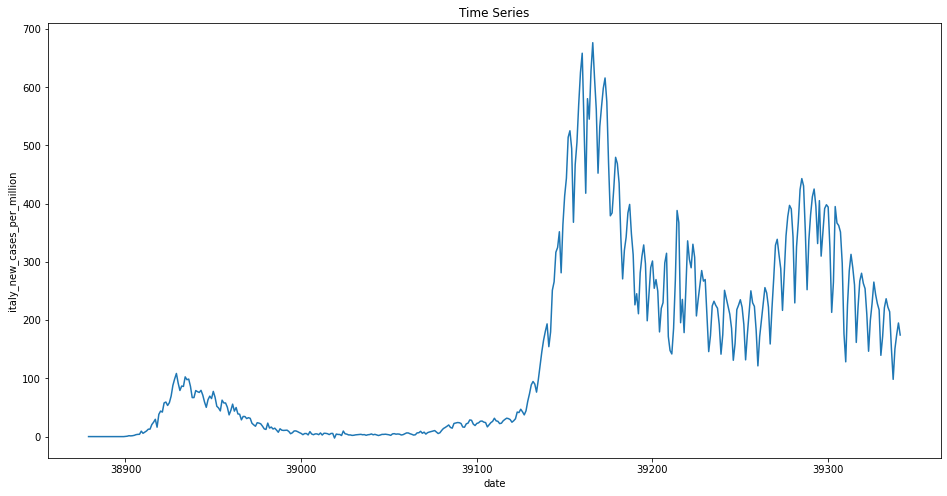

In [343]:
it_cov19['new_cases_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("italy_new_cases_per_million")

Text(0, 0.5, 'italy_new_deaths_per_million')

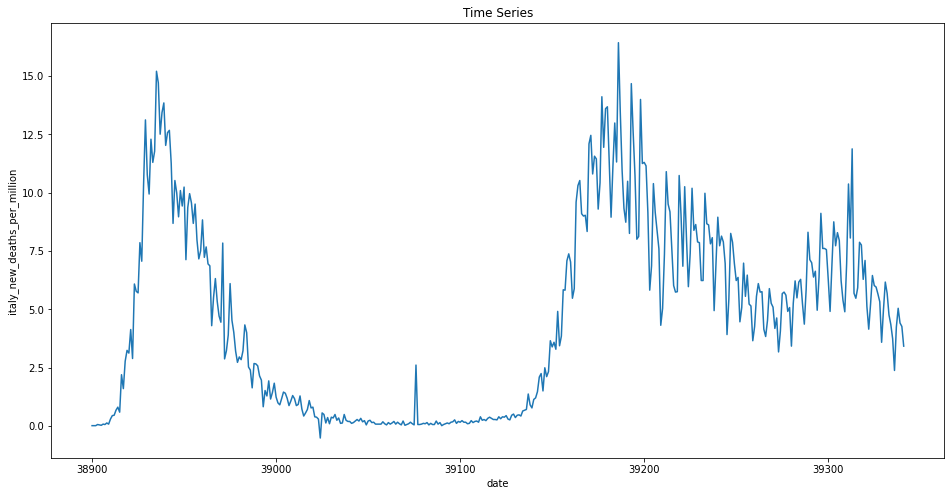

In [344]:
it_cov19['new_deaths_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("italy_new_deaths_per_million")

Brazil

In [345]:
country = "Brazil"

include_br = train[train['location'].values == country] 
exclude_br = train[train['location'].values != country]
br_cov19 = include_br
br_cov19

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
11112,BRA,South America,Brazil,2020-02-26,1.0,1.0,NaN,NaN,NaN,NaN,0.005,0.005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,26022020
11113,BRA,South America,Brazil,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.005,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,27022020
11114,BRA,South America,Brazil,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.005,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,28022020
11115,BRA,South America,Brazil,2020-02-29,2.0,1.0,NaN,NaN,NaN,NaN,0.009,0.005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,29022020
11116,BRA,South America,Brazil,2020-03-01,2.0,0.0,NaN,NaN,NaN,NaN,0.009,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,01032020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11544,BRA,South America,Brazil,2021-05-03,14779529.0,24619.0,58586.571,408622.0,983.0,2383.714,69531.286,115.822,275.624,1922.390,4.625,11.214,0.98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43962159.0,29865013.0,14097146.0,788803.0,710754.0,20.68,14.05,6.63,3344.0,NaN,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,03052021
11545,BRA,South America,Brazil,2021-05-04,14856888.0,77359.0,59332.143,411588.0,2966.0,2366.571,69895.226,363.941,279.132,1936.343,13.954,11.134,0.98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45273825.0,30658945.0,14614880.0,1311666.0,729289.0,21.30,14.42,6.88,3431.0,NaN,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,04052021
11546,BRA,South America,Brazil,2021-05-05,14930183.0,73295.0,58413.429,414399.0,2811.0,2316.286,70240.048,344.821,274.810,1949.568,13.225,10.897,0.98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46185689.0,31265483.0,14920206.0,9118

Text(0, 0.5, 'brazil_new_cases_per_million')

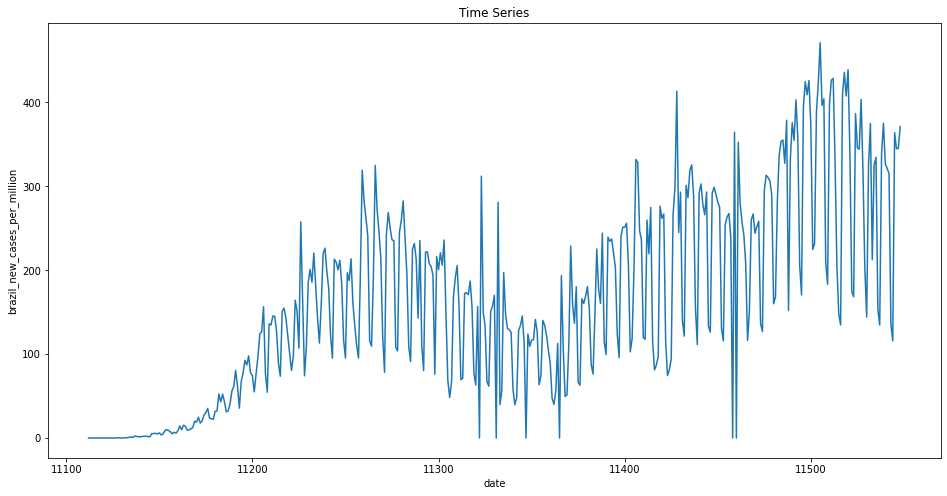

In [346]:
br_cov19['new_cases_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("brazil_new_cases_per_million")

Text(0, 0.5, 'brazil_new_deaths_per_million')

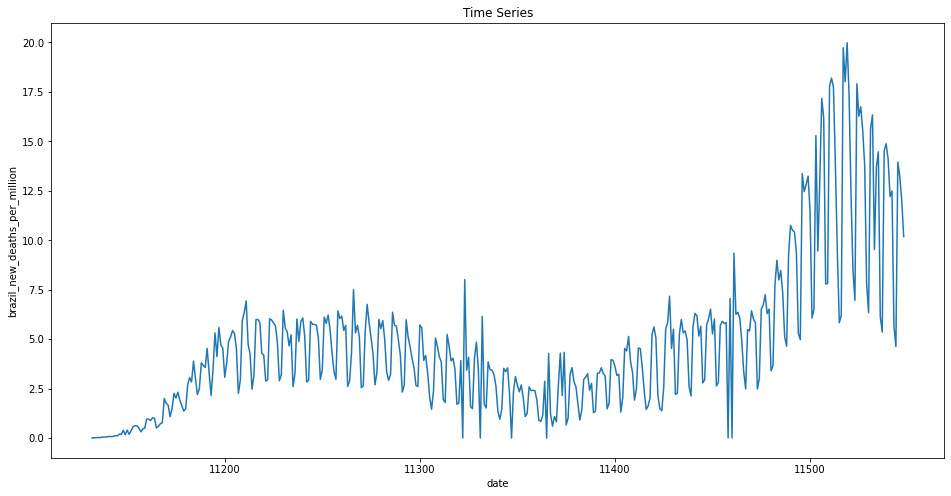

In [347]:
br_cov19['new_deaths_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("brazil_new_deaths_per_million")

Portugal

In [348]:
country = "Portugal"

include_p = train[train['location'].values == country]
exclude_p = train[train['location'].values != country]
p_cov19 = include_p
p_cov19

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
62940,PRT,Europe,Portugal,2020-02-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.904,0.971,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,10196707.0,112.371,46.2,21.502,14.924,27936.896,0.5,127.842,9.85,16.3,30.0,NaN,3.39,82.05,0.864,02022020
62941,PRT,Europe,Portugal,2020-02-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.904,0.971,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,10196707.0,112.371,46.2,21.502,14.924,27936.896,0.5,127.842,9.85,16.3,30.0,NaN,3.39,82.05,0.864,09022020
62942,PRT,Europe,Portugal,2020-02-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.846,1.554,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,10196707.0,112.371,46.2,21.502,14.924,27936.896,0.5,127.842,9.85,16.3,30.0,NaN,3.39,82.05,0.864,15022020
62943,PRT,Europe,Portugal,2020-02-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.807,1.943,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,10196707.0,112.371,46.2,21.502,14.924,27936.896,0.5,127.842,9.85,16.3,30.0,NaN,3.39,82.05,0.864,23022020
62944,PRT,Europe,Portugal,2020-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.721,2.817,NaN,25.0,0.002,NaN,NaN,NaN,NaN,NaN,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,10196707.0,112.371,46.2,21.502,14.924,27936.896,0.5,127.842,9.85,16.3,30.0,NaN,3.39,82.05,0.864,01032020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63372,PRT,Europe,Portugal,2021-05-03,837457.0,180.0,402.714,16977.0,0.0,1.714,82130.143,17.653,39.495,1664.949,0.000,0.168,0.83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51640.0,10688207.0,1048.202,5.064,47042.0,4.613,0.009,116.8,tests performed,3442517.0,2532434.0,910061.0,20725.0,58627.0,33.76,24.84,8.93,5750.0,72.22,10196707.0,112.371,46.2,21.502,14.924,27936.896,0.5,127.842,9.85,16.3,30.0,NaN,3.39,82.05,0.864,03052021
63373,PRT,Europe,Portugal,2021-05-04,837715.0,258.0,389.143,16981.0,4.0,1.571,82155.445,25.302,38.164,1665.342,0.392,0.154,0.81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51522.0,10739729.0,1053.255,5.053,46195.0,4.530,0.008,118.7,tests performed,3507577.0,2583878.0,923677.0,65060.0,60936.0,34.40,25.34,9.06,5976.0,72.22,10196707.0,112.371,46.2,21.502,14.924,27936.896,0.5,127.842,9.85,16.3,30.0,NaN,3.39,82.05,0.864,04052021
63374,PRT,Europe,Portugal,2021-05-05,838102.0,387.0,362.714,16983.0,2.0,1.429,82193.398,37.953,35.572,1665.538,0.196,0.140,0.80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41902.0,10781631.0,1057.364,4.109

Text(0, 0.5, 'portugal_new_cases_per_million')

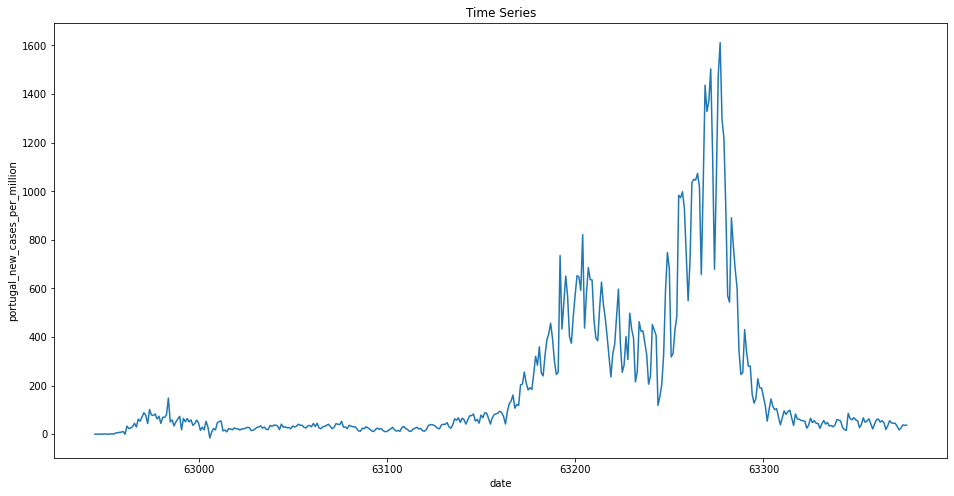

In [349]:
p_cov19['new_cases_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("portugal_new_cases_per_million")

Text(0, 0.5, 'portugal_new_deaths_per_million')

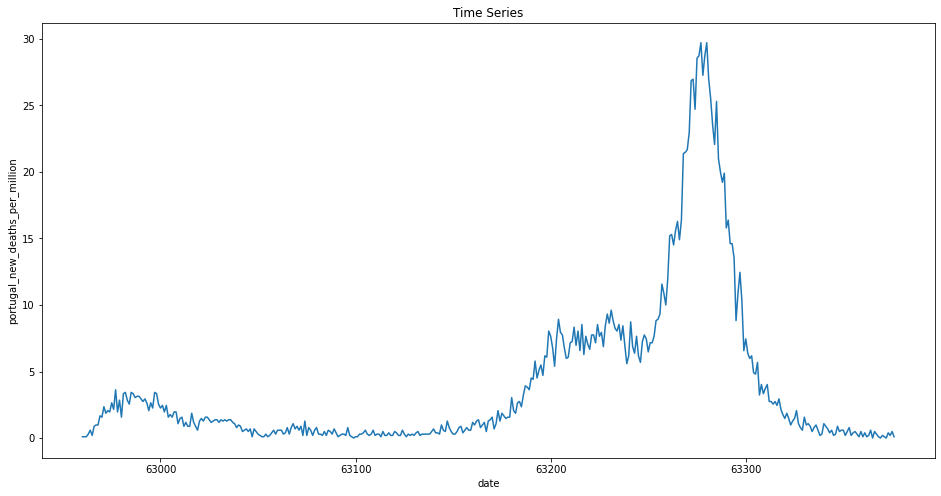

In [350]:
p_cov19['new_deaths_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("portugal_new_deaths_per_million")

Spain

In [351]:
country = "Spain"

include_sp = train[train['location'].values == country]
exclude_sp = train[train['location'].values != country]
sp_cov19 = include_sp
sp_cov19

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
73331,ESP,Europe,Spain,2020-02-01,1.0,1.0,NaN,NaN,NaN,NaN,0.021,0.021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,46754783.0,93.105,45.5,19.436,13.799,34272.36,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56,0.904,01022020
73332,ESP,Europe,Spain,2020-02-02,1.0,0.0,NaN,NaN,NaN,NaN,0.021,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.963,0.063,17.78,0.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,46754783.0,93.105,45.5,19.436,13.799,34272.36,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56,0.904,02022020
73333,ESP,Europe,Spain,2020-02-03,1.0,0.0,NaN,NaN,NaN,NaN,0.021,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,46754783.0,93.105,45.5,19.436,13.799,34272.36,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56,0.904,03022020
73334,ESP,Europe,Spain,2020-02-04,1.0,0.0,NaN,NaN,NaN,NaN,0.021,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,46754783.0,93.105,45.5,19.436,13.799,34272.36,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56,0.904,04022020
73335,ESP,Europe,Spain,2020-02-05,1.0,0.0,NaN,NaN,NaN,NaN,0.021,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,46754783.0,93.105,45.5,19.436,13.799,34272.36,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56,0.904,05022020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73788,ESP,Europe,Spain,2021-05-03,3540430.0,16353.0,7423.000,78293.0,77.0,79.286,75723.376,349.761,158.765,1674.545,1.647,1.696,0.91,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17430810.0,12381213.0,5202297.0,252244.0,348020.0,37.28,26.48,11.13,7444.0,67.59,46754783.0,93.105,45.5,19.436,13.799,34272.36,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56,0.904,03052021
73789,ESP,Europe,Spain,2021-05-04,3544945.0,4515.0,6973.000,78399.0,106.0,77.714,75819.943,96.568,149.140,1676.812,2.267,1.662,0.89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17916566.0,12686341.0,5394315.0,485756.0,362672.0,38.32,27.13,11.54,7757.0,NaN,46754783.0,93.105,45.5,19.436,13.799,34272.36,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56,0.904,04052021
73790,ESP,Europe,Spain,2021-05-05,3551262.0,6317.0,6637.571,78566.0,167.0,89.000,75955.053,135.109,141.966,1680.384,3.572,1.904,0.89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18489580.0,12966552.0,5696827.0,573014.0,375687.0,39.55,27.73,12.18,8035.0,NaN,46754783.0,93.105,45.

Text(0, 0.5, 'spain_new_cases_per_million')

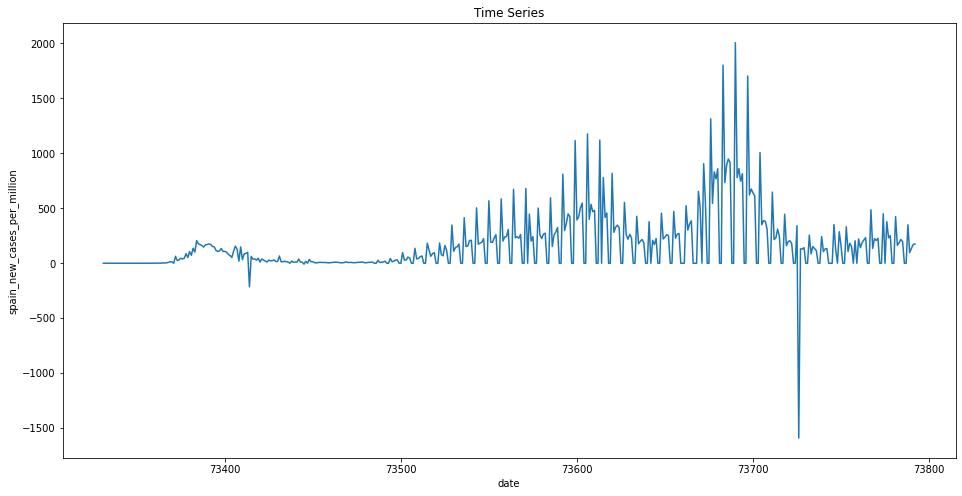

In [352]:
sp_cov19['new_cases_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("spain_new_cases_per_million")

Text(0, 0.5, 'spain_new_deaths_per_million')

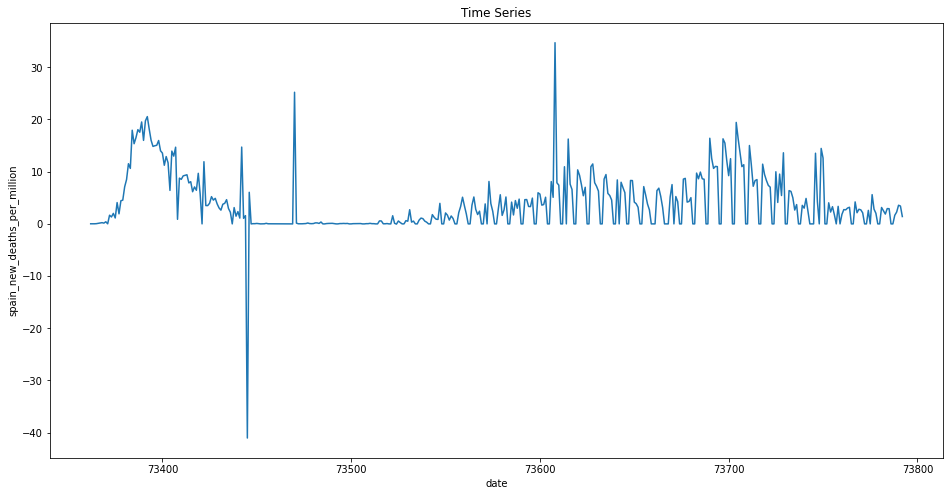

In [353]:
sp_cov19['new_deaths_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("spain_new_deaths_per_million")

India

In [354]:
country = "India"

include_i = train[train['location'].values == country]
exclude_i = train[train['location'].values != country]
i_cov19 = include_i
i_cov19

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
35657,IND,Asia,India,2020-01-30,1.0,1.0,NaN,NaN,NaN,NaN,0.001,0.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.19,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,30012020
35658,IND,Asia,India,2020-01-31,1.0,0.0,NaN,NaN,NaN,NaN,0.001,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.19,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,31012020
35659,IND,Asia,India,2020-02-01,1.0,0.0,NaN,NaN,NaN,NaN,0.001,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.19,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,01022020
35660,IND,Asia,India,2020-02-02,2.0,1.0,NaN,NaN,NaN,NaN,0.001,0.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.19,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,02022020
35661,IND,Asia,India,2020-02-03,3.0,1.0,NaN,NaN,NaN,NaN,0.002,0.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.19,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,03022020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36116,IND,Asia,India,2021-05-03,20282833.0,357316.0,378092.429,222408.0,3449.0,3502.000,14697.658,258.924,273.979,161.165,2.499,2.538,1.23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1504698.0,291647037.0,211.338,1.090,1760837.0,1.276,0.215,4.7,samples tested,156082136.0,127696675.0,28385461.0,1870625.0,1936741.0,11.31,9.25,2.06,1403.0,NaN,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,03052021
36117,IND,Asia,India,2021-05-04,20664979.0,382146.0,381123.714,226188.0,3780.0,3571.571,14974.575,276.917,276.176,163.904,2.739,2.588,1.23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1663742.0,293310779.0,212.543,1.206,1761557.0,1.276,0.216,4.6,samples tested,157750752.0,128627919.0,29122833.0,1668616.0,1838788.0,11.43,9.32,2.11,1332.0,NaN,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,04052021
36118,IND,Asia,India,2021-05-05,21077410.0,412431.0,385855.571,230168.0,3980.0,3619.429,15273.437,298.862,279.605,166.788,2.884,2.623,1.23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1541299.0,294852078.

Text(0, 0.5, 'us_new_cases_per_million')

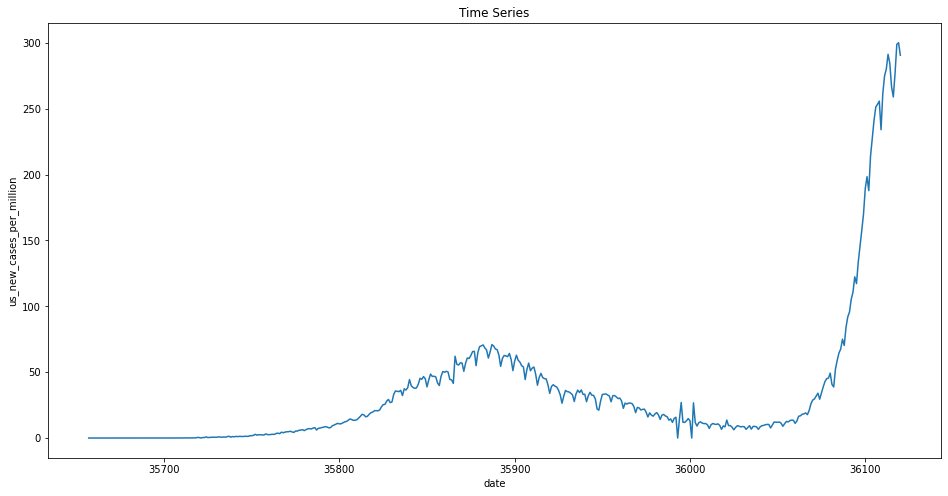

In [355]:
i_cov19['new_cases_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("us_new_cases_per_million")

Text(0, 0.5, 'us_new_deaths_per_million')

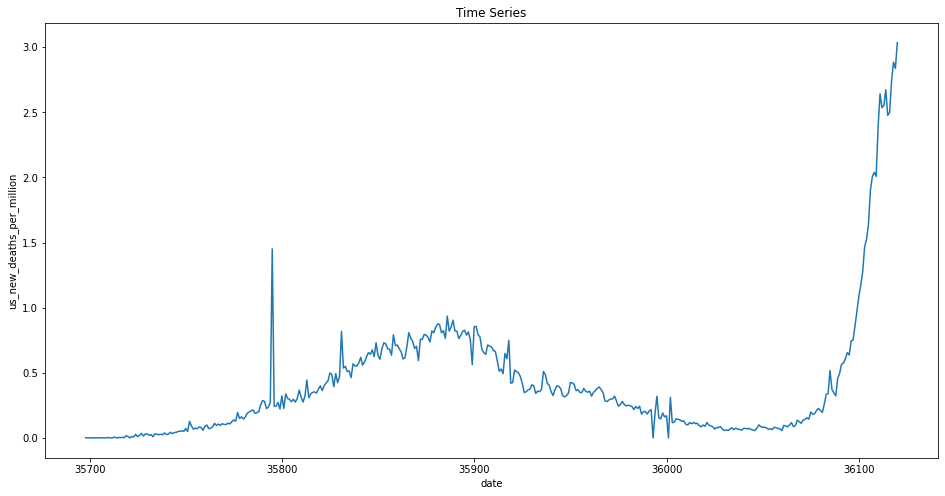

In [356]:
i_cov19['new_deaths_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("us_new_deaths_per_million")

China

In [357]:
country = "China"

include_c = train[train['location'].values == country]
exclude_c = train[train['location'].values != country]
c_cov19 = include_c
c_cov19

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
16411,CHN,Asia,China,2020-01-22,548.0,NaN,NaN,17.0,NaN,NaN,0.381,NaN,NaN,0.012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.39,1.439324e+09,147.674,38.7,10.641,5.929,15308.712,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91,0.761,22012020
16412,CHN,Asia,China,2020-01-23,643.0,95.0,NaN,18.0,1.0,NaN,0.447,0.066,NaN,0.013,0.001,NaN,3.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.91,1.439324e+09,147.674,38.7,10.641,5.929,15308.712,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91,0.761,23012020
16413,CHN,Asia,China,2020-01-24,920.0,277.0,NaN,26.0,8.0,NaN,0.639,0.192,NaN,0.018,0.006,NaN,3.23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.91,1.439324e+09,147.674,38.7,10.641,5.929,15308.712,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91,0.761,24012020
16414,CHN,Asia,China,2020-01-25,1406.0,486.0,NaN,42.0,16.0,NaN,0.977,0.338,NaN,0.029,0.011,NaN,3.36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.69,1.439324e+09,147.674,38.7,10.641,5.929,15308.712,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91,0.761,25012020
16415,CHN,Asia,China,2020-01-26,2075.0,669.0,NaN,56.0,14.0,NaN,1.442,0.465,NaN,0.039,0.010,NaN,3.41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.91,1.439324e+09,147.674,38.7,10.641,5.929,15308.712,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91,0.761,26012020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16878,CHN,Asia,China,2021-05-03,102549.0,19.0,21.429,4846.0,0.0,0.143,71.248,0.013,0.015,3.367,0.000,0.0,0.82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,279905000.0,NaN,NaN,4567000.0,7202286.0,19.45,NaN,NaN,5004.0,78.24,1.439324e+09,147.674,38.7,10.641,5.929,15308.712,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91,0.761,03052021
16879,CHN,Asia,China,2021-05-04,102560.0,11.0,20.143,4846.0,0.0,0.143,71.256,0.008,0.014,3.367,0.000,0.0,0.81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,284595000.0,NaN,NaN,4690000.0,6945571.0,19.77,NaN,NaN,4826.0,NaN,1.439324e+09,147.674,38.7,10.641,5.929,15308.712,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91,0.761,04052021
16880,CHN,Asia,China,2021-05-05,102571.0,11.0,17.857,4846.0,0.0,0.143,71.263,0.008,0.012,3.367,0.000,0.0,0.80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,289627000.0,NaN,NaN,5032000.0,6531714.0,20.12,NaN,NaN,4538.0,NaN,1.439324e+09,147.674,38.7,10.641,5.929,15308.712,0.7,261.899,9.74,1.9,48.4,NaN,4.

Text(0, 0.5, 'china_new_cases_per_million')

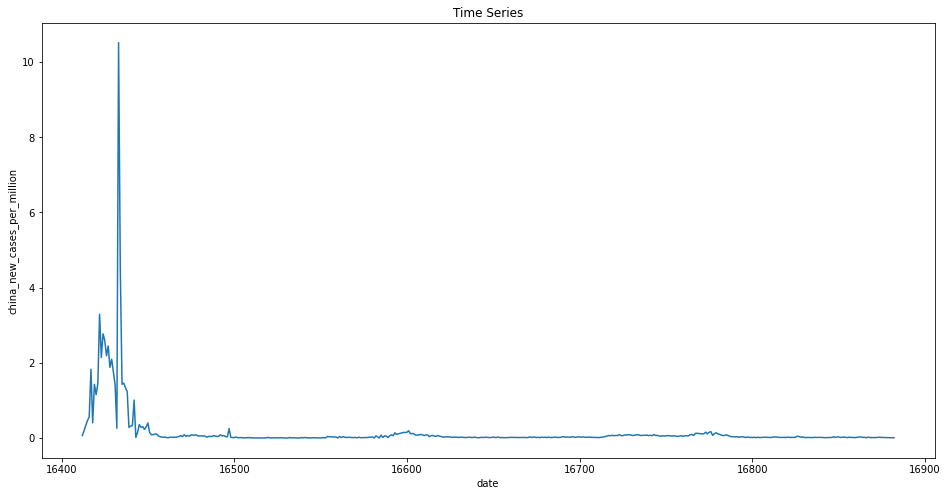

In [358]:
c_cov19['new_cases_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("china_new_cases_per_million")

Text(0, 0.5, 'china_new_deaths_per_million')

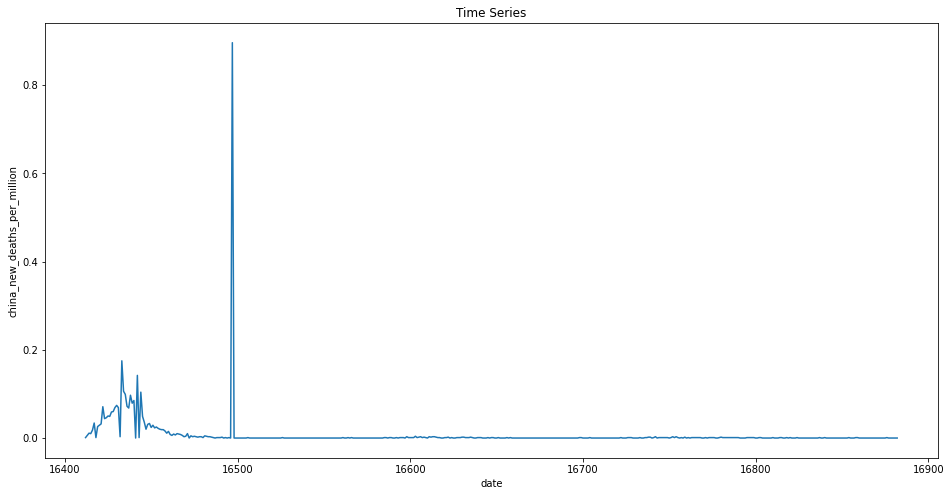

In [359]:
c_cov19['new_deaths_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("china_new_deaths_per_million")

Taiwan

In [360]:
country = "Taiwan"

include_t = train[train['location'].values == country]
exclude_t = train[train['location'].values != country]
t_cov19 = include_t
t_cov19

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
76414,TWN,Asia,Taiwan,2020-01-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,4.0,0.000,0.000,NaN,NaN,NaN,NaN,people tested,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,23816775.0,NaN,42.2,NaN,8.353,NaN,NaN,103.957,NaN,NaN,NaN,NaN,NaN,80.46,NaN,16012020
76415,TWN,Asia,Taiwan,2020-01-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,people tested,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,23816775.0,NaN,42.2,NaN,8.353,NaN,NaN,103.957,NaN,NaN,NaN,NaN,NaN,80.46,NaN,17012020
76416,TWN,Asia,Taiwan,2020-01-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,5.0,0.000,0.000,NaN,NaN,NaN,NaN,people tested,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,23816775.0,NaN,42.2,NaN,8.353,NaN,NaN,103.957,NaN,NaN,NaN,NaN,NaN,80.46,NaN,18012020
76417,TWN,Asia,Taiwan,2020-01-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,6.0,0.000,0.000,NaN,NaN,NaN,NaN,people tested,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,23816775.0,NaN,42.2,NaN,8.353,NaN,NaN,103.957,NaN,NaN,NaN,NaN,NaN,80.46,NaN,19012020
76418,TWN,Asia,Taiwan,2020-01-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,8.0,0.000,0.000,NaN,NaN,NaN,NaN,people tested,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.89,23816775.0,NaN,42.2,NaN,8.353,NaN,NaN,103.957,NaN,NaN,NaN,NaN,NaN,80.46,NaN,20012020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76887,TWN,Asia,Taiwan,2021-05-03,1145.0,8.0,5.857,12.0,0.0,0.0,48.075,0.336,0.246,0.504,0.0,0.0,1.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1399.0,210543.0,8.840,0.059,818.0,0.034,0.007,139.7,people tested,62437.0,NaN,NaN,4185.0,2436.0,0.26,NaN,NaN,102.0,25.00,23816775.0,NaN,42.2,NaN,8.353,NaN,NaN,103.957,NaN,NaN,NaN,NaN,NaN,80.46,NaN,03052021
76888,TWN,Asia,Taiwan,2021-05-04,1153.0,8.0,6.143,12.0,0.0,0.0,48.411,0.336,0.258,0.504,0.0,0.0,1.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,991.0,211534.0,8.882,0.042,853.0,0.036,0.007,138.9,people tested,67931.0,NaN,NaN,5494.0,2822.0,0.29,NaN,NaN,118.0,NaN,23816775.0,NaN,42.2,NaN,8.353,NaN,NaN,103.957,NaN,NaN,NaN,NaN,NaN,80.46,NaN,04052021
76889,TWN,Asia,Taiwan,2021-05-05,1160.0,7.0,6.286,12.0,0.0,0.0,48.705,0.294,0.264,0.504,0.0,0.0,1.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1097.0,212631.0,8.928,0.046,900.0,0.038,0.007,143.2,people tested,73988.0,NaN,NaN,6057.0,3308.0,0.31,NaN,NaN,139.0,NaN,23816775.0,NaN,42.2,NaN,8.353,NaN,NaN,103.957,NaN,NaN,NaN,NaN,NaN,80.46,NaN,05052021
76890,TWN,Asia,Taiwan,2021-05-06,1173.0,13.0,7.429,12.0,0.0,0.0,49.251,0.546,0.312,0.504,0.0,0.0,NaN,NaN,NaN,

Text(0, 0.5, 'taiwan_new_cases_per_million')

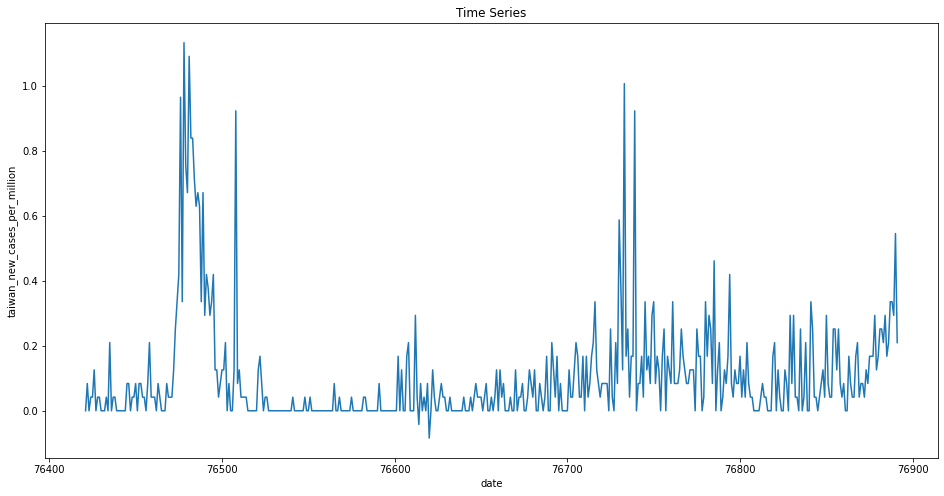

In [361]:
t_cov19['new_cases_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("taiwan_new_cases_per_million")

Text(0, 0.5, 'taiwan_new_deaths_per_million')

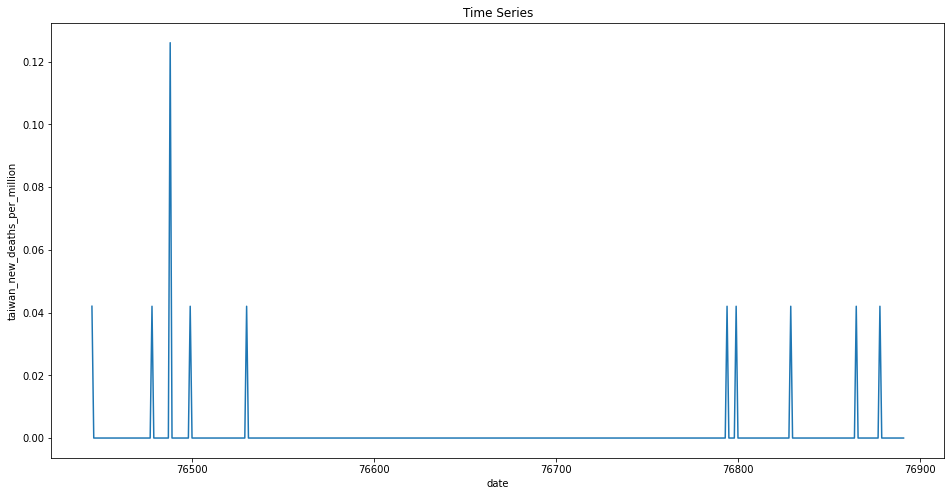

In [362]:
t_cov19['new_deaths_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("taiwan_new_deaths_per_million")

Japan

In [363]:
country = "Japan"

include_j = train[train['location'].values == country]
exclude_j = train[train['location'].values != country]
j_cov19 = include_j
j_cov19

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
39765,JPN,Asia,Japan,2020-01-22,2.0,NaN,NaN,NaN,NaN,NaN,0.016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.78,126476458.0,347.778,48.2,27.049,18.493,39002.223,NaN,79.37,5.72,11.2,33.7,NaN,13.05,84.63,0.919,22012020
39766,JPN,Asia,Japan,2020-01-23,2.0,0.0,NaN,NaN,NaN,NaN,0.016,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.78,126476458.0,347.778,48.2,27.049,18.493,39002.223,NaN,79.37,5.72,11.2,33.7,NaN,13.05,84.63,0.919,23012020
39767,JPN,Asia,Japan,2020-01-24,2.0,0.0,NaN,NaN,NaN,NaN,0.016,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.78,126476458.0,347.778,48.2,27.049,18.493,39002.223,NaN,79.37,5.72,11.2,33.7,NaN,13.05,84.63,0.919,24012020
39768,JPN,Asia,Japan,2020-01-25,2.0,0.0,NaN,NaN,NaN,NaN,0.016,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.78,126476458.0,347.778,48.2,27.049,18.493,39002.223,NaN,79.37,5.72,11.2,33.7,NaN,13.05,84.63,0.919,25012020
39769,JPN,Asia,Japan,2020-01-26,4.0,2.0,NaN,NaN,NaN,NaN,0.032,0.016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.78,126476458.0,347.778,48.2,27.049,18.493,39002.223,NaN,79.37,5.72,11.2,33.7,NaN,13.05,84.63,0.919,26012020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40232,JPN,Asia,Japan,2021-05-03,609625.0,4475.0,5388.714,10391.0,49.0,60.429,4820.067,35.382,42.606,82.158,0.387,0.478,1.09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44186.0,11368154.0,89.884,0.349,64899.0,0.513,0.083,12.0,people tested,NaN,NaN,NaN,NaN,102947.0,NaN,NaN,NaN,814.0,38.43,126476458.0,347.778,48.2,27.049,18.493,39002.223,NaN,79.37,5.72,11.2,33.7,NaN,13.05,84.63,0.919,03052021
40233,JPN,Asia,Japan,2021-05-04,613822.0,4197.0,5278.857,10441.0,50.0,58.571,4853.251,33.184,41.738,82.553,0.395,0.463,1.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27746.0,11395900.0,90.103,0.219,57285.0,0.453,0.092,10.9,people tested,NaN,NaN,NaN,NaN,79075.0,NaN,NaN,NaN,625.0,38.43,126476458.0,347.778,48.2,27.049,18.493,39002.223,NaN,79.37,5.72,11.2,33.7,NaN,13.05,84.63,0.919,04052021
40234,JPN,Asia,Japan,2021-05-05,617890.0,4068.0,5317.714,10501.0,60.0,64.143,4885.415,32.164,42.045,83.027,0.474,0.507,1.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67085.0,11462985.0,90.633,0.530,57139.0,0.452,0.093,10.7,people tested,3836845.0,2793847.0,1042998.0,NaN,68465.0,3.03,2.21,0.82,541.0,38.43,126476458.0,347.77

Text(0, 0.5, 'japan_new_cases_per_million')

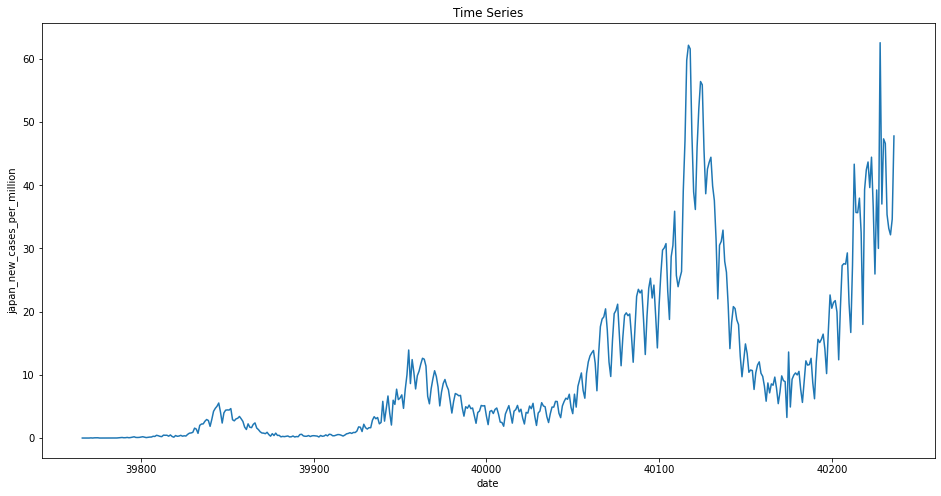

In [364]:
j_cov19['new_cases_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("japan_new_cases_per_million")

Text(0, 0.5, 'japan_new_deaths_per_million')

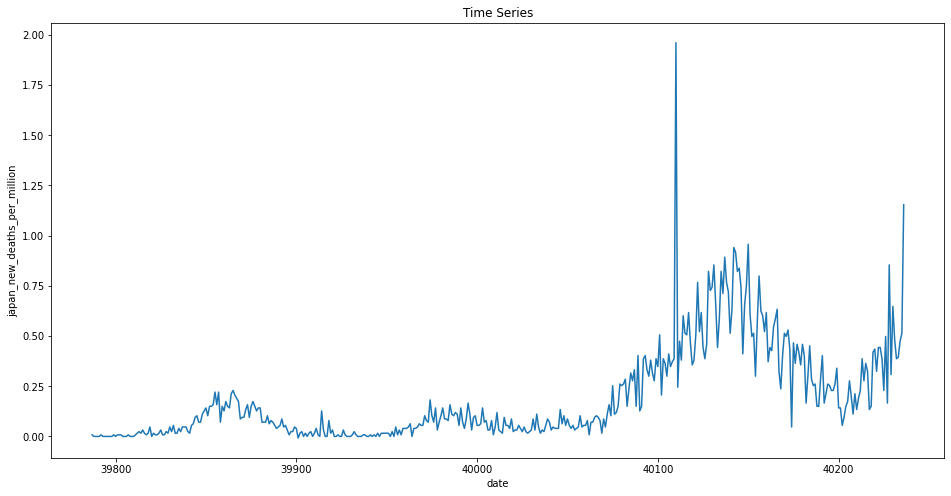

In [365]:
j_cov19['new_deaths_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("japan_new_deaths_per_million")

New Zealand

In [366]:
country = "New Zealand"

include_nz = train[train['location'].values == country]
exclude_nz = train[train['location'].values != country]
nz_cov19 = include_nz
nz_cov19

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
55371,NZL,Oceania,New Zealand,2020-02-28,1.0,1.0,NaN,NaN,NaN,NaN,0.207,0.207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.44,4822233.0,18.206,37.9,15.322,9.72,36085.843,NaN,128.797,8.08,14.8,17.2,NaN,2.61,82.29,0.931,28022020
55372,NZL,Oceania,New Zealand,2020-02-29,1.0,0.0,NaN,NaN,NaN,NaN,0.207,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.44,4822233.0,18.206,37.9,15.322,9.72,36085.843,NaN,128.797,8.08,14.8,17.2,NaN,2.61,82.29,0.931,29022020
55373,NZL,Oceania,New Zealand,2020-03-01,1.0,0.0,NaN,NaN,NaN,NaN,0.207,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,225.0,0.047,NaN,NaN,NaN,NaN,NaN,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.44,4822233.0,18.206,37.9,15.322,9.72,36085.843,NaN,128.797,8.08,14.8,17.2,NaN,2.61,82.29,0.931,01032020
55374,NZL,Oceania,New Zealand,2020-03-02,1.0,0.0,NaN,NaN,NaN,NaN,0.207,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.0,254.0,0.053,0.006,NaN,NaN,NaN,NaN,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.44,4822233.0,18.206,37.9,15.322,9.72,36085.843,NaN,128.797,8.08,14.8,17.2,NaN,2.61,82.29,0.931,02032020
55375,NZL,Oceania,New Zealand,2020-03-03,1.0,0.0,NaN,NaN,NaN,NaN,0.207,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.0,280.0,0.058,0.005,NaN,NaN,NaN,NaN,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.44,4822233.0,18.206,37.9,15.322,9.72,36085.843,NaN,128.797,8.08,14.8,17.2,NaN,2.61,82.29,0.931,03032020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55801,NZL,Oceania,New Zealand,2021-05-03,2623.0,1.0,2.000,26.0,0.0,0.0,543.939,0.207,0.415,5.392,0.0,0.0,1.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2248.0,2029196.0,420.800,0.466,3767.0,0.781,0.001,1883.5,tests performed,291665.0,209625.0,82040.0,10504.0,9300.0,6.05,4.35,1.70,1929.0,NaN,4822233.0,18.206,37.9,15.322,9.72,36085.843,NaN,128.797,8.08,14.8,17.2,NaN,2.61,82.29,0.931,03052021
55802,NZL,Oceania,New Zealand,2021-05-04,2629.0,6.0,2.857,26.0,0.0,0.0,545.183,1.244,0.592,5.392,0.0,0.0,1.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2729.0,2031925.0,421.366,0.566,3872.0,0.803,0.001,1355.3,tests performed,304900.0,217603.0,87297.0,13235.0,9783.0,6.32,4.51,1.81,2029.0,NaN,4822233.0,18.206,37.9,15.322,9.72,36085.843,NaN,128.797,8.08,14.8,17.2,NaN,2.61,82.29,0.931,04052021
55803,NZL,Oceania,New Zealand,2021-05-05,2633.0,4.0,2.857,26.0,0.0,0.0,546.013,0.829,0.592,5.392,0.0,0.0,1.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5424.0,2037349.0,422.491,1.125,4164.0,0.864,0.001,1457.5,tests performed,NaN,NaN,

Text(0, 0.5, 'new_zealand_new_cases_per_million')

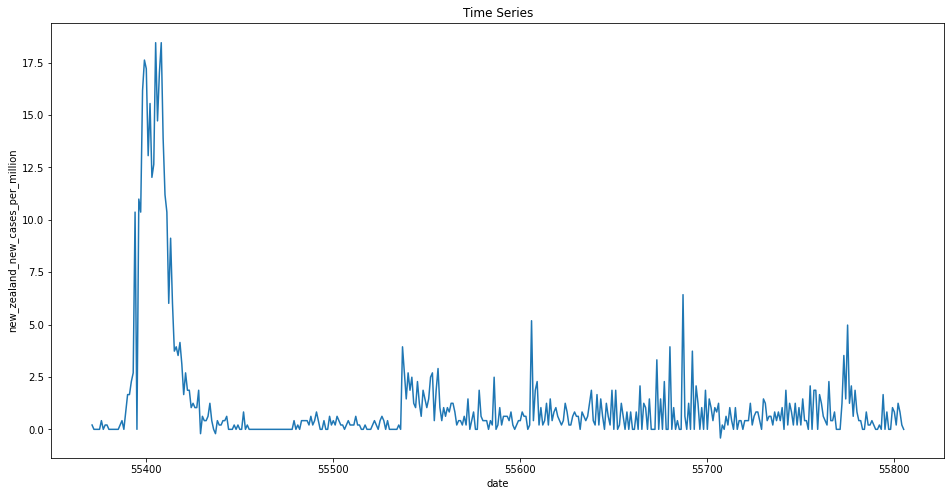

In [367]:
nz_cov19['new_cases_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("new_zealand_new_cases_per_million")

Text(0, 0.5, 'new_zealand_new_deaths_per_million')

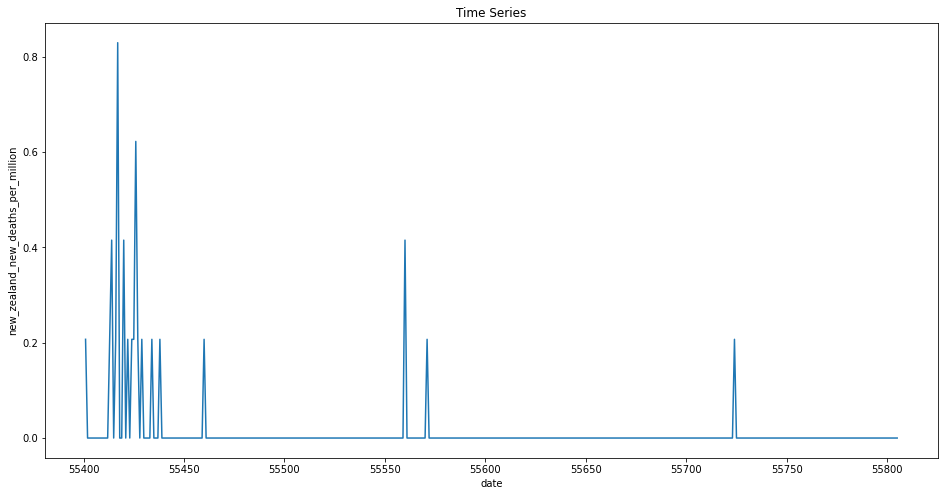

In [368]:
nz_cov19['new_deaths_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("new_zealand_new_deaths_per_million")

Australia

In [369]:
country = "Australia"

include_a = train[train['location'].values == country]
exclude_a = train[train['location'].values != country]
a_cov19 = include_a
a_cov19

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
4548,AUS,Oceania,Australia,2020-01-26,4.0,4.0,NaN,NaN,NaN,NaN,0.157,0.157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,25499881.0,3.202,37.9,15.504,10.129,44648.71,0.5,107.791,5.07,13.0,16.5,NaN,3.84,83.44,0.944,26012020
4549,AUS,Oceania,Australia,2020-01-27,5.0,1.0,NaN,NaN,NaN,NaN,0.196,0.039,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,25499881.0,3.202,37.9,15.504,10.129,44648.71,0.5,107.791,5.07,13.0,16.5,NaN,3.84,83.44,0.944,27012020
4550,AUS,Oceania,Australia,2020-01-28,5.0,0.0,NaN,NaN,NaN,NaN,0.196,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,25499881.0,3.202,37.9,15.504,10.129,44648.71,0.5,107.791,5.07,13.0,16.5,NaN,3.84,83.44,0.944,28012020
4551,AUS,Oceania,Australia,2020-01-29,6.0,1.0,NaN,NaN,NaN,NaN,0.235,0.039,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,25499881.0,3.202,37.9,15.504,10.129,44648.71,0.5,107.791,5.07,13.0,16.5,NaN,3.84,83.44,0.944,29012020
4552,AUS,Oceania,Australia,2020-01-30,9.0,3.0,NaN,NaN,NaN,NaN,0.353,0.118,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,25499881.0,3.202,37.9,15.504,10.129,44648.71,0.5,107.791,5.07,13.0,16.5,NaN,3.84,83.44,0.944,30012020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5011,AUS,Oceania,Australia,2021-05-03,29850.0,12.0,19.000,910.0,0.0,0.0,1170.594,0.471,0.745,35.686,0.0,0.0,0.87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39065.0,16946216.0,664.561,1.532,47291.0,1.855,0.0,2489.0,tests performed,2260615.0,NaN,NaN,6541.0,46161.0,8.87,NaN,NaN,1810.0,48.61,25499881.0,3.202,37.9,15.504,10.129,44648.71,0.5,107.791,5.07,13.0,16.5,NaN,3.84,83.44,0.944,03052021
5012,AUS,Oceania,Australia,2021-05-04,29865.0,15.0,16.429,910.0,0.0,0.0,1171.182,0.588,0.644,35.686,0.0,0.0,0.86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30733.0,16976949.0,665.766,1.205,41474.0,1.626,0.0,2524.4,tests performed,2316969.0,NaN,NaN,56354.0,49662.0,9.09,NaN,NaN,1948.0,48.61,25499881.0,3.202,37.9,15.504,10.129,44648.71,0.5,107.791,5.07,13.0,16.5,NaN,3.84,83.44,0.944,04052021
5013,AUS,Oceania,Australia,2021-05-05,29884.0,19.0,15.857,910.0,0.0,0.0,1171.927,0.745,0.622,35.686,0.0,0.0,0.87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53237.0,17030186.0,667.854,2.088,40584.0,1.592,0.0,2559.4,tests performed,2396314.0,NaN,NaN,79345.0,52396.0,9.40,NaN,NaN,2055.0,48.61,25499881.0,3.

Text(0, 0.5, 'australia_new_cases_per_million')

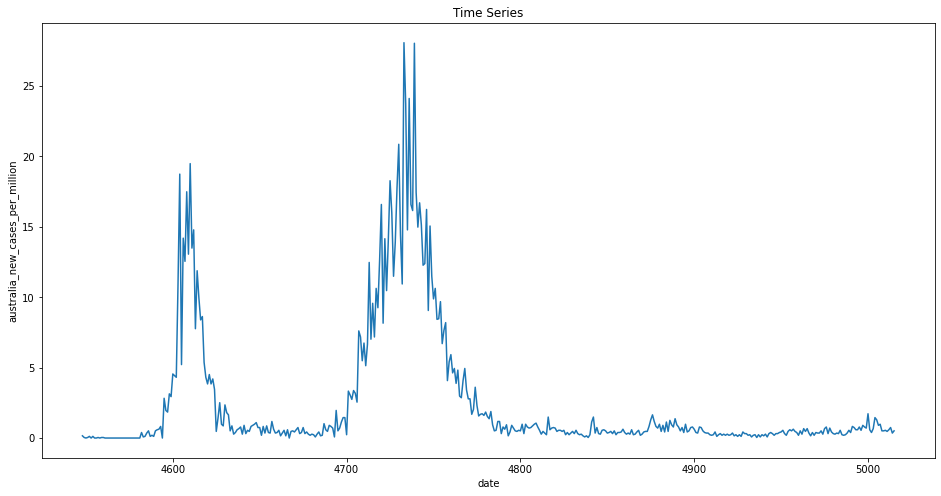

In [370]:
a_cov19['new_cases_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("australia_new_cases_per_million")

Text(0, 0.5, 'australia_new_deaths_per_million')

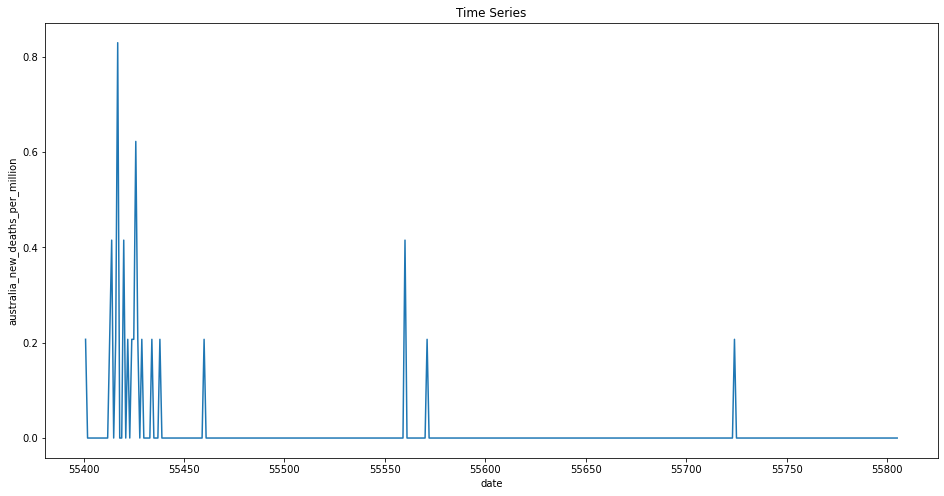

In [371]:
nz_cov19['new_deaths_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("australia_new_deaths_per_million")

South Africa

In [372]:
country = "South Africa"

include_sa = train[train['location'].values == country]
exclude_sa = train[train['location'].values != country]
sa_cov19 = include_sa
sa_cov19

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
71563,ZAF,Africa,South Africa,2020-02-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.0,0.001,NaN,NaN,NaN,NaN,NaN,people tested,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.78,59308690.0,46.754,27.3,5.344,3.053,12294.876,18.9,200.38,5.52,8.1,33.2,43.993,2.32,64.13,0.709,07022020
71564,ZAF,Africa,South Africa,2020-02-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,people tested,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.78,59308690.0,46.754,27.3,5.344,3.053,12294.876,18.9,200.38,5.52,8.1,33.2,43.993,2.32,64.13,0.709,08022020
71565,ZAF,Africa,South Africa,2020-02-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,people tested,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.78,59308690.0,46.754,27.3,5.344,3.053,12294.876,18.9,200.38,5.52,8.1,33.2,43.993,2.32,64.13,0.709,09022020
71566,ZAF,Africa,South Africa,2020-02-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,people tested,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.78,59308690.0,46.754,27.3,5.344,3.053,12294.876,18.9,200.38,5.52,8.1,33.2,43.993,2.32,64.13,0.709,10022020
71567,ZAF,Africa,South Africa,2020-02-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61.0,0.001,NaN,NaN,NaN,NaN,NaN,people tested,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.78,59308690.0,46.754,27.3,5.344,3.053,12294.876,18.9,200.38,5.52,8.1,33.2,43.993,2.32,64.13,0.709,11022020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72014,ZAF,Africa,South Africa,2021-05-03,1584961.0,897.0,1234.429,54452.0,35.0,38.000,26723.925,15.124,20.814,918.112,0.590,0.641,1.18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16752.0,10715773.0,180.678,0.282,24279.0,0.409,0.051,19.7,people tested,329098.0,329098.0,329098.0,NaN,4526.0,0.55,0.55,0.55,76.0,50.93,59308690.0,46.754,27.3,5.344,3.053,12294.876,18.9,200.38,5.52,8.1,33.2,43.993,2.32,64.13,0.709,03052021
72015,ZAF,Africa,South Africa,2021-05-04,1586148.0,1187.0,1278.286,54511.0,59.0,39.143,26743.939,20.014,21.553,919.106,0.995,0.660,1.21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24040.0,10739813.0,181.083,0.405,24603.0,0.415,0.052,19.2,people tested,353181.0,353181.0,353181.0,24083.0,7914.0,0.60,0.60,0.60,133.0,NaN,59308690.0,46.754,27.3,5.344,3.053,12294.876,18.9,200.38,5.52,8.1,33.2,43.993,2.32,64.13,0.709,04052021
72016,ZAF,Africa,South Africa,2021-05-05,1588221.0,2073.0,1395.857,54557.0,46.0,38.857,26778.892,34.953,23.535,919.882,0.776,0.655,1.23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33414.0,107

Text(0, 0.5, 'sa_new_cases_per_million')

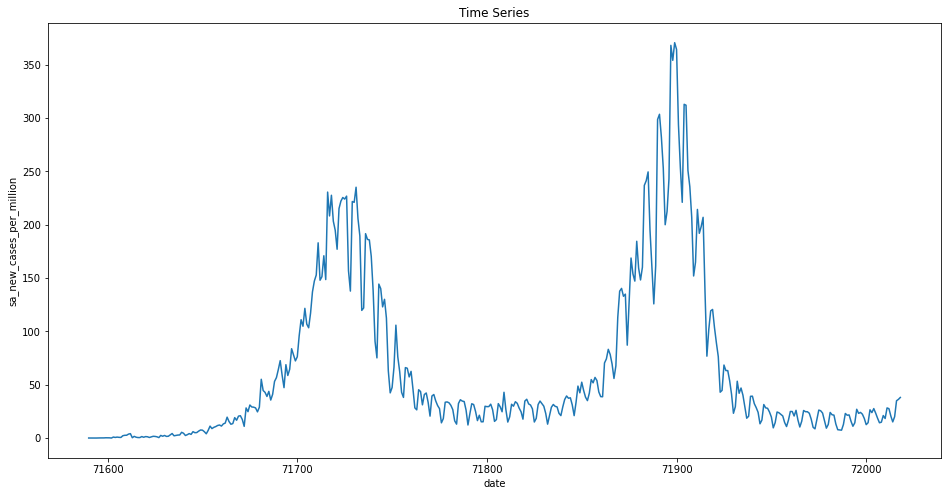

In [373]:
sa_cov19['new_cases_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("sa_new_cases_per_million")

Text(0, 0.5, 'sa_new_deaths_per_million')

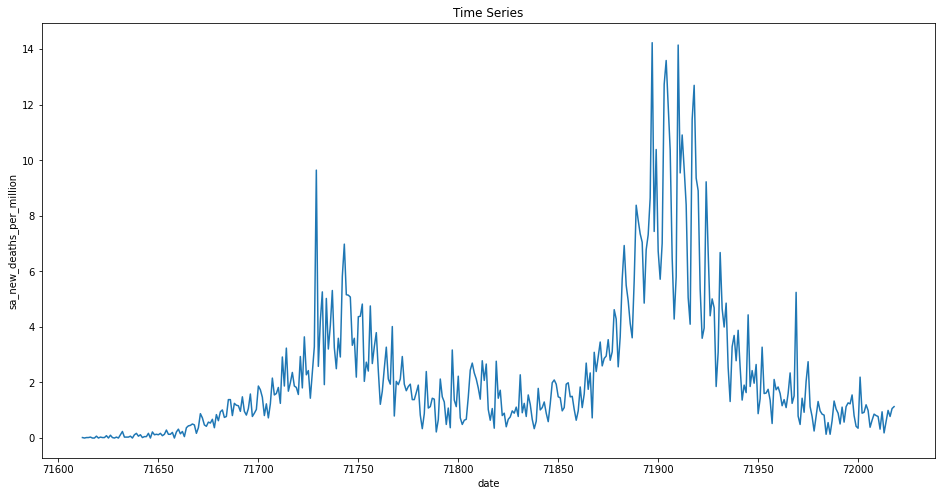

In [374]:
sa_cov19['new_deaths_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("sa_new_deaths_per_million")

Nigeria

In [230]:
country = "Nigeria"

include_n = train[train['location'].values == country]
exclude_n = train[train['location'].values != country]
n_cov19 = include_n
n_cov19

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
56635,NGA,Africa,Nigeria,2020-02-28,1.0,1.0,NaN,NaN,NaN,NaN,0.005,0.005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,206139587.0,209.588,18.1,2.751,1.447,5338.454,NaN,181.013,2.42,0.6,10.8,41.949,NaN,54.69,0.539,28022020
56636,NGA,Africa,Nigeria,2020-02-29,1.0,0.0,NaN,NaN,NaN,NaN,0.005,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,206139587.0,209.588,18.1,2.751,1.447,5338.454,NaN,181.013,2.42,0.6,10.8,41.949,NaN,54.69,0.539,29022020
56637,NGA,Africa,Nigeria,2020-03-01,1.0,0.0,NaN,NaN,NaN,NaN,0.005,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,206139587.0,209.588,18.1,2.751,1.447,5338.454,NaN,181.013,2.42,0.6,10.8,41.949,NaN,54.69,0.539,01032020
56638,NGA,Africa,Nigeria,2020-03-02,1.0,0.0,NaN,NaN,NaN,NaN,0.005,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,206139587.0,209.588,18.1,2.751,1.447,5338.454,NaN,181.013,2.42,0.6,10.8,41.949,NaN,54.69,0.539,02032020
56639,NGA,Africa,Nigeria,2020-03-03,1.0,0.0,NaN,NaN,NaN,NaN,0.005,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,206139587.0,209.588,18.1,2.751,1.447,5338.454,NaN,181.013,2.42,0.6,10.8,41.949,NaN,54.69,0.539,03032020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57065,NGA,Africa,Nigeria,2021-05-03,165199.0,46.0,63.286,2063.0,0.0,0.143,801.394,0.223,0.307,10.008,0.00,0.001,0.76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1939165.0,9.407,NaN,3791.0,0.018,0.017,59.9,samples tested,1236815.0,1236815.0,NaN,7082.0,8790.0,0.60,0.60,NaN,43.0,NaN,206139587.0,209.588,18.1,2.751,1.447,5338.454,NaN,181.013,2.42,0.6,10.8,41.949,NaN,54.69,0.539,03052021
57066,NGA,Africa,Nigeria,2021-05-04,165215.0,16.0,43.286,2063.0,0.0,0.000,801.471,0.078,0.210,10.008,0.00,0.000,0.74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1246845.0,1246845.0,NaN,10030.0,9272.0,0.60,0.60,NaN,45.0,NaN,206139587.0,209.588,18.1,2.751,1.447,5338.454,NaN,181.013,2.42,0.6,10.8,41.949,NaN,54.69,0.539,04052021
57067,NGA,Africa,Nigeria,2021-05-05,165273.0,58.0,40.000,2065.0,2.0,0.286,801.753,0.281,0.194,10.017,0.01,0.001,0.74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1266742.0,1266742.0,NaN,19897.0,10740.0,0.61,0.61,NaN,52.0,NaN,206139587.0,209.588,18.1,2.751,1.447,5338.454,NaN,181.013,2.42,0.6,10.8,41.94

Text(0, 0.5, 'n_new_cases_per_million')

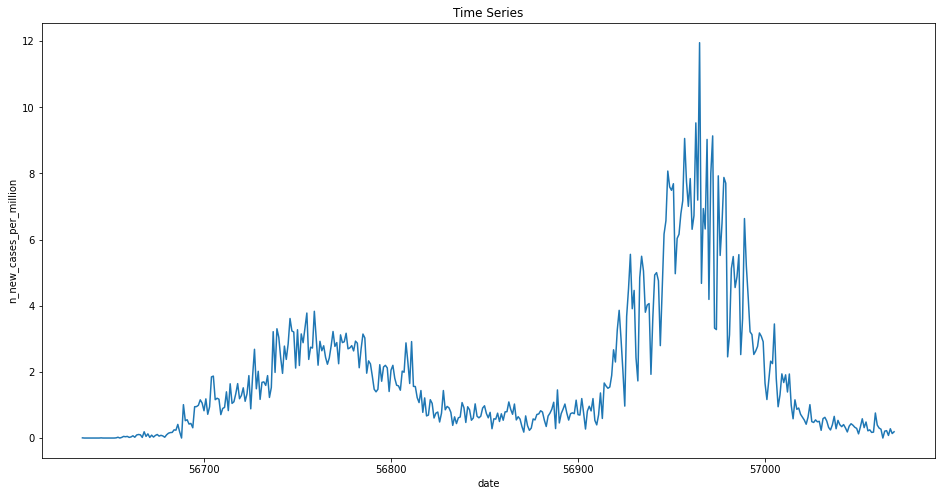

In [231]:
n_cov19['new_cases_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("n_new_cases_per_million")

Text(0, 0.5, 'n_new_deaths_per_million')

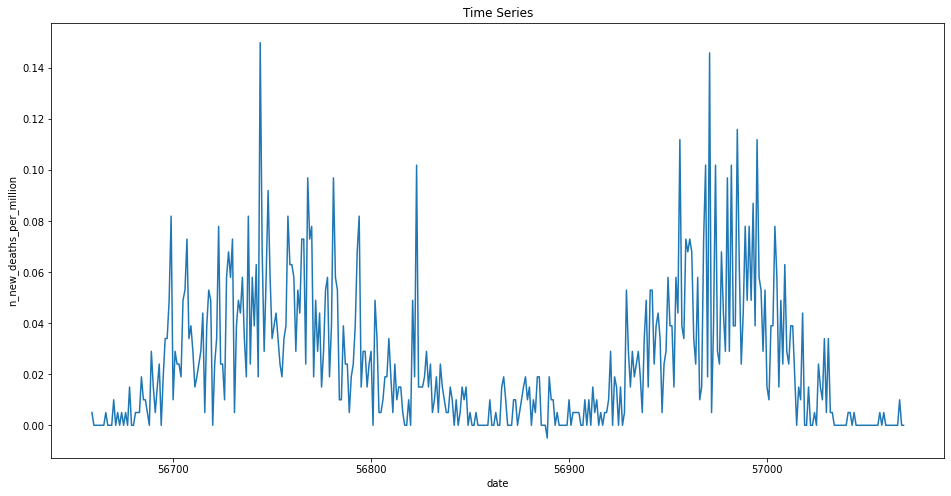

In [232]:
n_cov19['new_deaths_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("n_new_deaths_per_million")

Sweden

In [233]:
country = "Sweden"

include_s = train[train['location'].values == country]
exclude_s = train[train['location'].values != country]
s_cov19 = include_s
s_cov19

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
75102,SWE,Europe,Sweden,2020-02-01,1.0,1.0,NaN,NaN,NaN,NaN,0.099,0.099,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,10099270.0,24.718,41.0,19.985,13.433,46949.283,0.5,133.982,4.79,18.8,18.9,NaN,2.22,82.8,0.945,01022020
75103,SWE,Europe,Sweden,2020-02-02,1.0,0.0,NaN,NaN,NaN,NaN,0.099,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,10099270.0,24.718,41.0,19.985,13.433,46949.283,0.5,133.982,4.79,18.8,18.9,NaN,2.22,82.8,0.945,02022020
75104,SWE,Europe,Sweden,2020-02-03,1.0,0.0,NaN,NaN,NaN,NaN,0.099,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,10099270.0,24.718,41.0,19.985,13.433,46949.283,0.5,133.982,4.79,18.8,18.9,NaN,2.22,82.8,0.945,03022020
75105,SWE,Europe,Sweden,2020-02-04,1.0,0.0,NaN,NaN,NaN,NaN,0.099,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,10099270.0,24.718,41.0,19.985,13.433,46949.283,0.5,133.982,4.79,18.8,18.9,NaN,2.22,82.8,0.945,04022020
75106,SWE,Europe,Sweden,2020-02-05,1.0,0.0,NaN,NaN,NaN,NaN,0.099,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,10099270.0,24.718,41.0,19.985,13.433,46949.283,0.5,133.982,4.79,18.8,18.9,NaN,2.22,82.8,0.945,05022020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75559,SWE,Europe,Sweden,2021-05-03,973604.0,0.0,5037.286,14048.0,0.0,17.857,96403.403,0.000,498.777,1390.992,0.000,1.768,1.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38625.0,NaN,NaN,NaN,3825.0,65.74,10099270.0,24.718,41.0,19.985,13.433,46949.283,0.5,133.982,4.79,18.8,18.9,NaN,2.22,82.8,0.945,03052021
75560,SWE,Europe,Sweden,2021-05-04,988554.0,14950.0,5042.857,14091.0,43.0,17.571,97883.708,1480.305,499.329,1395.249,4.258,1.740,1.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3451239.0,2681307.0,769932.0,NaN,40491.0,34.17,26.55,7.62,4009.0,65.74,10099270.0,24.718,41.0,19.985,13.433,46949.283,0.5,133.982,4.79,18.8,18.9,NaN,2.22,82.8,0.945,04052021
75561,SWE,Europe,Sweden,2021-05-05,995595.0,7041.0,5010.714,14151.0,60.0,21.571,98580.888,697.179,496.146,1401.190,5.941,2.136,1.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3485725.0,2710287.0,775438.0,34486.0,40699.0,34.51,26.84,7.68,4030.0,65.74,10099270.0,24.718,41.0,19.985,13.433,46949.283,0.5,133.982,4.79,18.8,18

Text(0, 0.5, 'sweden_new_cases_per_million')

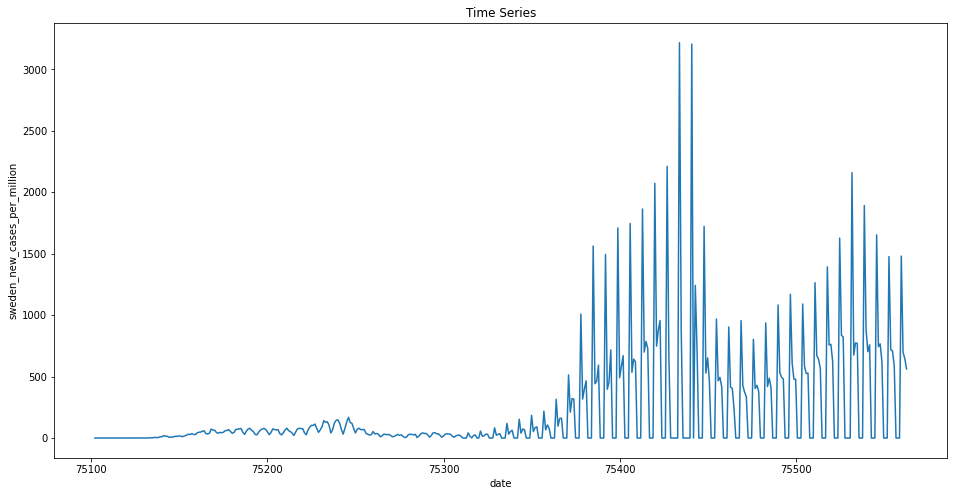

In [375]:
s_cov19['new_cases_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("sweden_new_cases_per_million")

Text(0, 0.5, 'sweden_new_deaths_per_million')

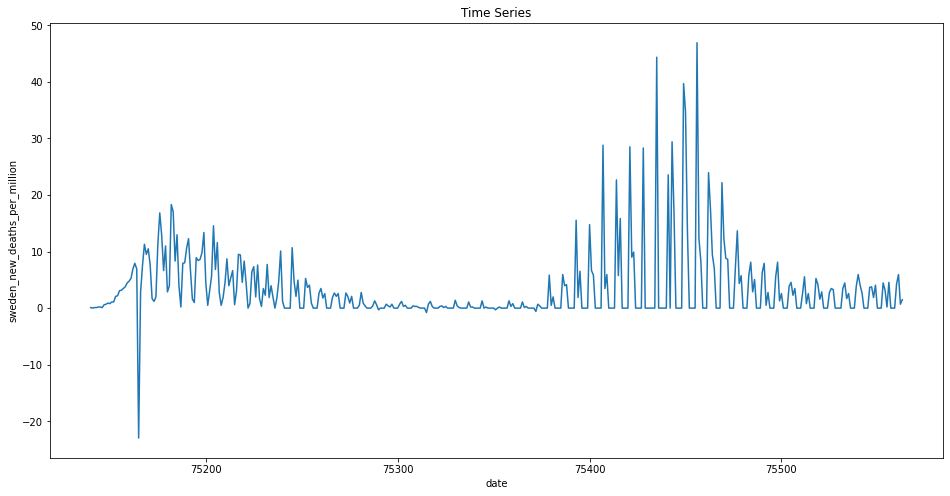

In [376]:
s_cov19['new_deaths_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("sweden_new_deaths_per_million")

Denmark

In [377]:
country = "Denmark"

include_d = train[train['location'].values == country]
exclude_d = train[train['location'].values != country]
d_cov19 = include_d
d_cov19

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
21136,DNK,Europe,Denmark,2020-02-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,0.000,NaN,NaN,NaN,NaN,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,5792203.0,136.52,42.3,19.677,12.325,46682.515,0.2,114.767,6.41,19.3,18.8,NaN,2.5,80.9,0.94,02022020
21137,DNK,Europe,Denmark,2020-02-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,5792203.0,136.52,42.3,19.677,12.325,46682.515,0.2,114.767,6.41,19.3,18.8,NaN,2.5,80.9,0.94,03022020
21138,DNK,Europe,Denmark,2020-02-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,5792203.0,136.52,42.3,19.677,12.325,46682.515,0.2,114.767,6.41,19.3,18.8,NaN,2.5,80.9,0.94,04022020
21139,DNK,Europe,Denmark,2020-02-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,5792203.0,136.52,42.3,19.677,12.325,46682.515,0.2,114.767,6.41,19.3,18.8,NaN,2.5,80.9,0.94,05022020
21140,DNK,Europe,Denmark,2020-02-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,5792203.0,136.52,42.3,19.677,12.325,46682.515,0.2,114.767,6.41,19.3,18.8,NaN,2.5,80.9,0.94,06022020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,DNK,Europe,Denmark,2021-05-03,254368.0,761.0,764.000,2491.0,0.0,1.857,43915.588,131.384,131.901,430.061,0.000,0.321,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,188737.0,27663562.0,4776.0,32.585,171195.0,29.556,0.004,224.1,tests performed,2103069.0,1387512.0,715557.0,66234.0,37630.0,36.31,23.95,12.35,6497.0,56.48,5792203.0,136.52,42.3,19.677,12.325,46682.515,0.2,114.767,6.41,19.3,18.8,NaN,2.5,80.9,0.94,03052021
21593,DNK,Europe,Denmark,2021-05-04,255178.0,810.0,790.571,2492.0,1.0,1.714,44055.431,139.843,136.489,430.234,0.173,0.296,0.97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2155347.0,1415092.0,740255.0,52278.0,38316.0,37.21,24.43,12.78,6615.0,56.48,5792203.0,136.52,42.3,19.677,12.325,46682.515,0.2,114.767,6.41,19.3,18.8,NaN,2.5,80.9,0.94,04052021
21594,DNK,Europe,Denmark,2021-05-05,255181.0,3.0,671.714,2492.0,0.0,1.429,44055.949,0.518,115.969,430.234,0.000,0.247,0.93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2211338.0,1441832.0,769506.0,55991.0,39925.0,38.18,24.89,13.2

Text(0, 0.5, 'denmark_new_cases_per_million')

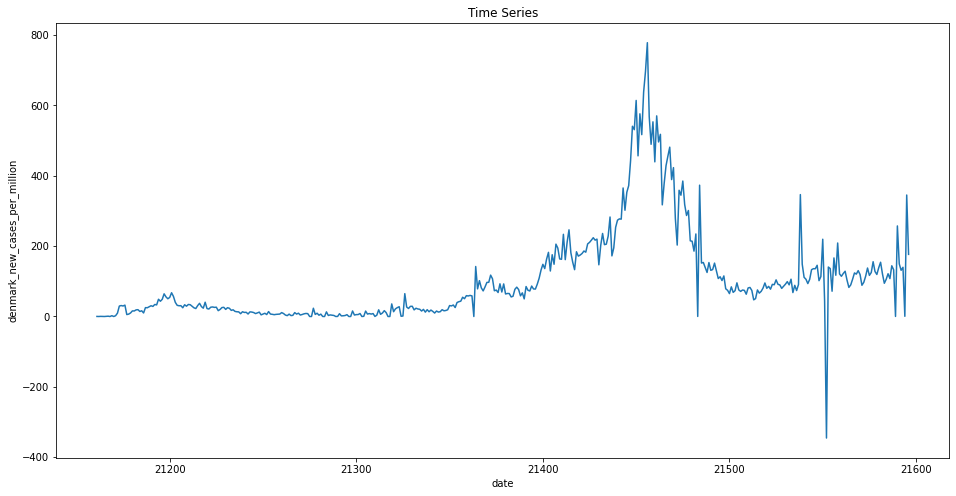

In [378]:
d_cov19['new_cases_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("denmark_new_cases_per_million")

Text(0, 0.5, 'denmark_new_deaths_per_million')

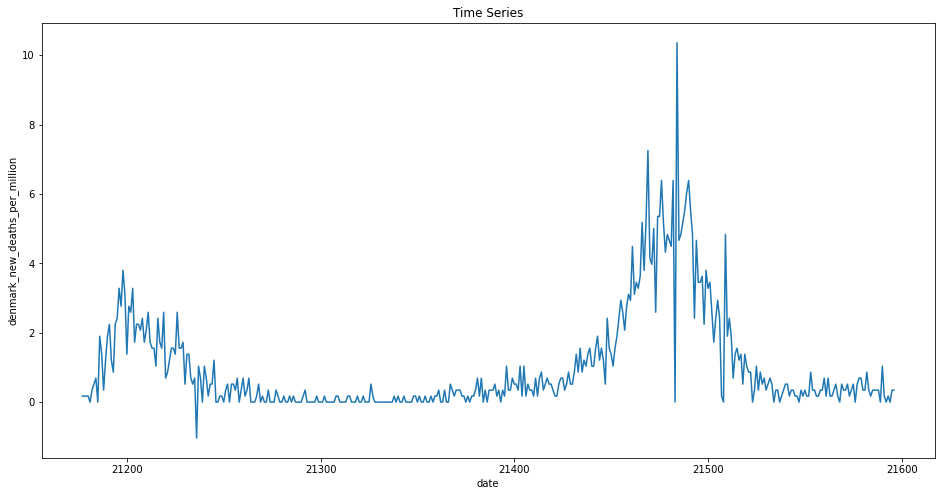

In [379]:
d_cov19['new_deaths_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("denmark_new_deaths_per_million")

Compare new cases per million to new deaths per million

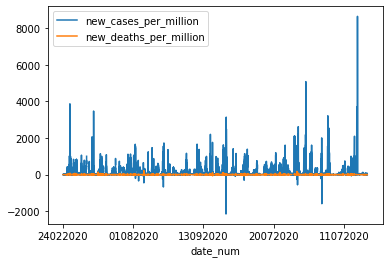

In [380]:
train.plot(x="date_num", y=["new_cases_per_million", "new_deaths_per_million"])

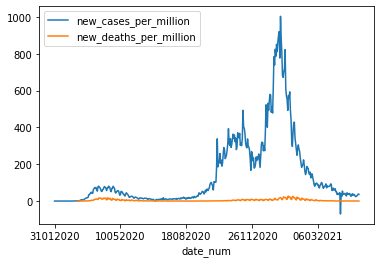

In [381]:
uk_cov19.plot(x="date_num", y=["new_cases_per_million", "new_deaths_per_million"])

Compare Countries

In [382]:
revised_uk_cov19 = uk_cov19[28:]
revised_uk_cov19

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
81730,GBR,Europe,United Kingdom,2020-02-28,56.0,12.0,4.714,NaN,NaN,0.000,0.825,0.177,0.069,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.932,28022020
81731,GBR,Europe,United Kingdom,2020-02-29,61.0,5.0,5.429,NaN,NaN,0.000,0.899,0.074,0.080,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.932,29022020
81732,GBR,Europe,United Kingdom,2020-03-01,94.0,33.0,9.429,NaN,NaN,0.000,1.385,0.486,0.139,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.932,01032020
81733,GBR,Europe,United Kingdom,2020-03-02,134.0,40.0,14.857,NaN,NaN,0.000,1.974,0.589,0.219,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.932,02032020
81734,GBR,Europe,United Kingdom,2020-03-03,189.0,55.0,22.143,NaN,NaN,0.000,2.784,0.810,0.326,NaN,NaN,0.000,2.11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.932,03032020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82160,GBR,Europe,United Kingdom,2021-05-03,4437505.0,1674.0,2134.714,127797.0,1.0,15.571,65367.008,24.659,31.446,1882.524,0.015,0.229,0.86,187.0,2.755,1297.0,19.106,NaN,NaN,NaN,NaN,1069724.0,156093792.0,2299.352,15.758,971705.0,14.314,0.002,455.2,tests performed,50297911.0,34667904.0,15630007.0,200099.0,464646.0,74.09,51.07,23.02,6845.0,59.72,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.932,03052021
82161,GBR,Europe,United Kingdom,2021-05-04,4439489.0,1984.0,2032.857,127803.0,6.0,14.000,65396.234,29.225,29.945,1882.612,0.088,0.206,0.88,181.0,2.666,1289.0,18.988,NaN,NaN,NaN,NaN,860368.0,157088742.0,2314.008,12.674,998197.0,14.704,0.002,491.0,tests performed,50682567.0,34795074.0,15887493.0,384656.0,448798.0,74.66,51.26,23.40,6611.0,59.72,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.932,04052021
82162,GBR,Europe,United Kingdom,2021-05-05,4441644.0,2155.0,

In [383]:
revised_us_cov19 = us_cov19[37:]
revised_us_cov19

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
82202,USA,North America,United States,2020-02-28,17.0,0.0,0.143,NaN,NaN,0.000,0.051,0.000,0.000,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,28022020
82203,USA,North America,United States,2020-02-29,25.0,8.0,1.286,1.0,1.0,0.143,0.076,0.024,0.004,0.003,0.003,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,29022020
82204,USA,North America,United States,2020-03-01,32.0,7.0,2.286,1.0,0.0,0.143,0.097,0.021,0.007,0.003,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,346.0,346.0,0.001,0.001,NaN,NaN,NaN,NaN,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,01032020
82205,USA,North America,United States,2020-03-02,55.0,23.0,5.571,6.0,5.0,0.857,0.166,0.069,0.017,0.018,0.015,0.003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,503.0,849.0,0.003,0.002,NaN,NaN,NaN,NaN,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,02032020
82206,USA,North America,United States,2020-03-03,74.0,19.0,8.286,7.0,1.0,1.000,0.224,0.057,0.025,0.021,0.003,0.003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,606.0,1455.0,0.004,0.002,NaN,NaN,NaN,NaN,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,03032020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82632,USA,North America,United States,2021-05-03,32472201.0,50560.0,49618.857,577566.0,483.0,670.429,98102.542,152.748,149.905,1744.898,1.459,2.025,0.87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,481328.0,421479493.0,1273.342,1.454,1037958.0,3.136,0.047,21.3,tests performed,246780203.0,147517734.0,105523520.0,1188734.0,2287393.0,73.79,44.11,31.55,6839.0,56.94,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,03052021
82633,USA,North America,United States,2021-05-04,32512934.0,40733.0,48172.714,578499.0,933.0,712.000,98225.601,123.059,145.536,1747.717,2.819,2.151,0.86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,433402.0,421912895.0,1274.651,1.309,881319.0,2.663,0.054,18.5,tests performed,247769049.0,147894671.0,106168588.0,988846.0,2194483.0,74.08,44.22,31.75,6562.0,56.94,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.08

In [384]:
revised_fr_cov19 = fr_cov19[35:]
revised_fr_cov19

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
28357,FRA,Europe,France,2020-02-28,57.0,19.0,6.429,2.0,0.0,0.143,0.836,0.279,0.094,0.029,0.000,0.002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.89,68147687.0,122.578,42.0,19.718,13.079,38605.671,NaN,86.06,4.77,30.1,35.6,NaN,5.98,82.66,0.901,28022020
28358,FRA,Europe,France,2020-02-29,100.0,43.0,12.571,2.0,0.0,0.143,1.467,0.631,0.184,0.029,0.000,0.002,NaN,9.0,0.132,86.0,1.262,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.72,68147687.0,122.578,42.0,19.718,13.079,38605.671,NaN,86.06,4.77,30.1,35.6,NaN,5.98,82.66,0.901,29022020
28359,FRA,Europe,France,2020-03-01,130.0,30.0,16.857,2.0,0.0,0.143,1.908,0.440,0.247,0.029,0.000,0.002,3.00,9.0,0.132,116.0,1.702,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.72,68147687.0,122.578,42.0,19.718,13.079,38605.671,NaN,86.06,4.77,30.1,35.6,NaN,5.98,82.66,0.901,01032020
28360,FRA,Europe,France,2020-03-02,191.0,61.0,25.571,3.0,1.0,0.286,2.803,0.895,0.375,0.044,0.015,0.004,2.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.98,68147687.0,122.578,42.0,19.718,13.079,38605.671,NaN,86.06,4.77,30.1,35.6,NaN,5.98,82.66,0.901,02032020
28361,FRA,Europe,France,2020-03-03,212.0,21.0,28.286,4.0,1.0,0.429,3.111,0.308,0.415,0.059,0.015,0.006,2.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.98,68147687.0,122.578,42.0,19.718,13.079,38605.671,NaN,86.06,4.77,30.1,35.6,NaN,5.98,82.66,0.901,03032020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28787,FRA,Europe,France,2021-05-03,5717160.0,3767.0,21725.714,105291.0,311.0,268.000,83893.676,55.277,318.803,1545.041,4.564,3.933,0.83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,479036.0,NaN,NaN,7.029,310009.0,4.549,0.069,14.5,people tested,22909701.0,16187686.0,6787880.0,427880.0,397313.0,33.62,23.75,9.96,5830.0,63.89,68147687.0,122.578,42.0,19.718,13.079,38605.671,NaN,86.06,4.77,30.1,35.6,NaN,5.98,82.66,0.901,03052021
28788,FRA,Europe,France,2021-05-04,5741537.0,24377.0,20876.286,105548.0,257.0,255.143,84251.385,357.708,306.339,1548.813,3.771,3.744,0.84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23430956.0,16490558.0,7014467.0,521255.0,405465.0,34.38,24.20,10.29,5950.0,63.89,68147687.0,122.578,42.0,19.718,13.079,38605.671,NaN,86.06,4.77,30.1,35.6,NaN,5.98,82.66,0.901,04052021
28789,FRA,Europe,France,2021-05-05,5767541.0,26004.0,20079.429,105792.0,244.0,245.000,84632.968,381.583,294.646,1552.393,3.580,3.595,0.84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [385]:
revised_it_cov19 = it_cov19[28:]
revised_it_cov19

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
38907,ITA,Europe,Italy,2020-02-28,888.0,233.0,124.000,21.0,4.0,2.857,14.687,3.854,2.051,0.347,0.066,0.047,3.24,64.0,1.059,409.0,6.765,NaN,NaN,NaN,NaN,3681.0,15695.0,0.260,0.061,NaN,NaN,NaN,NaN,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.91,60461828.0,205.859,47.9,23.021,16.24,35220.084,2.0,113.151,4.78,19.8,27.8,NaN,3.18,83.51,0.892,28022020
38908,ITA,Europe,Italy,2020-02-29,1128.0,240.0,152.286,29.0,8.0,3.857,18.656,3.969,2.519,0.480,0.132,0.064,3.12,105.0,1.737,506.0,8.369,NaN,NaN,NaN,NaN,2966.0,18661.0,0.309,0.049,NaN,NaN,NaN,NaN,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.91,60461828.0,205.859,47.9,23.021,16.24,35220.084,2.0,113.151,4.78,19.8,27.8,NaN,3.18,83.51,0.892,29022020
38909,ITA,Europe,Italy,2020-03-01,1694.0,566.0,219.857,34.0,5.0,4.429,28.018,9.361,3.636,0.562,0.083,0.073,3.05,140.0,2.316,779.0,12.884,NaN,NaN,2275.879,37.642,2466.0,21127.0,0.349,0.041,NaN,NaN,NaN,NaN,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.91,60461828.0,205.859,47.9,23.021,16.24,35220.084,2.0,113.151,4.78,19.8,27.8,NaN,3.18,83.51,0.892,01032020
38910,ITA,Europe,Italy,2020-03-02,2036.0,342.0,258.143,52.0,18.0,6.429,33.674,5.656,4.270,0.860,0.298,0.106,2.86,166.0,2.746,908.0,15.018,NaN,NaN,NaN,NaN,2218.0,23345.0,0.386,0.037,2717.0,0.045,0.095,10.5,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.91,60461828.0,205.859,47.9,23.021,16.24,35220.084,2.0,113.151,4.78,19.8,27.8,NaN,3.18,83.51,0.892,02032020
38911,ITA,Europe,Italy,2020-03-03,2502.0,466.0,311.429,79.0,27.0,9.857,41.381,7.707,5.151,1.307,0.447,0.163,2.75,229.0,3.788,1263.0,20.889,NaN,NaN,NaN,NaN,2511.0,25856.0,0.428,0.042,2462.0,0.041,0.126,7.9,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.91,60461828.0,205.859,47.9,23.021,16.24,35220.084,2.0,113.151,4.78,19.8,27.8,NaN,3.18,83.51,0.892,03032020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39337,ITA,Europe,Italy,2021-05-03,4050708.0,5946.0,11370.571,121433.0,256.0,270.571,66996.122,98.343,188.062,2008.424,4.234,4.475,0.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,121829.0,59236655.0,979.736,2.015,280688.0,4.642,0.041,24.7,tests performed,21239991.0,14933047.0,6405982.0,408105.0,432113.0,35.13,24.70,10.60,7147.0,75.00,60461828.0,205.859,47.9,23.021,16.24,35220.084,2.0,113.151,4.78,19.8,27.8,NaN,3.18,83.51,0.892,03052021
39338,ITA,Europe,Italy,2021-05-04,4059821.0,9113.0,11187.000,121738.0,305.0,260.857,67146.845,150.723,185.026,2013.469,5.045,4.314,0.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,315506.0,59552161.0,984.955,5.218,282513.0,4.673,0.040,25.3,tests performed,21682035.0,15242098.0,6549563.0,442044.0,442523.0,35.86,25.21,10.83,7319.0,75.00,60461828.0,205.859

In [386]:
revised_br_cov19 = br_cov19[2:]
revised_br_cov19

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
11114,BRA,South America,Brazil,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.005,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,28022020
11115,BRA,South America,Brazil,2020-02-29,2.0,1.0,NaN,NaN,NaN,NaN,0.009,0.005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,29022020
11116,BRA,South America,Brazil,2020-03-01,2.0,0.0,NaN,NaN,NaN,NaN,0.009,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,01032020
11117,BRA,South America,Brazil,2020-03-02,2.0,0.0,0.286,NaN,NaN,0.000,0.009,0.000,0.001,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,02032020
11118,BRA,South America,Brazil,2020-03-03,2.0,0.0,0.286,NaN,NaN,0.000,0.009,0.000,0.001,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,03032020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11544,BRA,South America,Brazil,2021-05-03,14779529.0,24619.0,58586.571,408622.0,983.0,2383.714,69531.286,115.822,275.624,1922.390,4.625,11.214,0.98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43962159.0,29865013.0,14097146.0,788803.0,710754.0,20.68,14.05,6.63,3344.0,NaN,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,03052021
11545,BRA,South America,Brazil,2021-05-04,14856888.0,77359.0,59332.143,411588.0,2966.0,2366.571,69895.226,363.941,279.132,1936.343,13.954,11.134,0.98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45273825.0,30658945.0,14614880.0,1311666.0,729289.0,21.30,14.42,6.88,3431.0,NaN,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,04052021
11546,BRA,South America,Brazil,2021-05-05,14930183.0,73295.0,58413.429,414399.0,2811.0,2316.286,70240.048,344.821,274.810,1949.568,13.225,10.897,0.98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46185689.0,31265483

In [387]:
revised_sp_cov19 = sp_cov19[27:]
revised_sp_cov19

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
73358,ESP,Europe,Spain,2020-02-28,32.0,17.0,4.286,NaN,NaN,0.000,0.684,0.364,0.092,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,46754783.0,93.105,45.5,19.436,13.799,34272.36,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56,0.904,28022020
73359,ESP,Europe,Spain,2020-02-29,45.0,13.0,6.143,NaN,NaN,0.000,0.962,0.278,0.131,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,46754783.0,93.105,45.5,19.436,13.799,34272.36,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56,0.904,29022020
73360,ESP,Europe,Spain,2020-03-01,84.0,39.0,11.714,NaN,NaN,0.000,1.797,0.834,0.251,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,190.644,4.078,1173.497,25.099,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,46754783.0,93.105,45.5,19.436,13.799,34272.36,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56,0.904,01032020
73361,ESP,Europe,Spain,2020-03-02,120.0,36.0,16.857,NaN,NaN,0.000,2.567,0.770,0.361,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,46754783.0,93.105,45.5,19.436,13.799,34272.36,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56,0.904,02032020
73362,ESP,Europe,Spain,2020-03-03,165.0,45.0,22.714,1.0,1.0,0.143,3.529,0.962,0.486,0.021,0.021,0.003,3.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,46754783.0,93.105,45.5,19.436,13.799,34272.36,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56,0.904,03032020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73788,ESP,Europe,Spain,2021-05-03,3540430.0,16353.0,7423.000,78293.0,77.0,79.286,75723.376,349.761,158.765,1674.545,1.647,1.696,0.91,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17430810.0,12381213.0,5202297.0,252244.0,348020.0,37.28,26.48,11.13,7444.0,67.59,46754783.0,93.105,45.5,19.436,13.799,34272.36,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56,0.904,03052021
73789,ESP,Europe,Spain,2021-05-04,3544945.0,4515.0,6973.000,78399.0,106.0,77.714,75819.943,96.568,149.140,1676.812,2.267,1.662,0.89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17916566.0,12686341.0,5394315.0,485756.0,362672.0,38.32,27.13,11.54,7757.0,NaN,46754783.0,93.105,45.5,19.436,13.799,34272.36,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56,0.904,04052021
73790,ESP,Europe,Spain,2021-05-05,3551262.0,6317.0,6637.571,78566.0,167.0,89.000,75955.053,135.109,141.966,1680.384,3.572,1.904,0.89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18489580.0,12966552.0,5696827.0,5

In [388]:
revised_p_cov19 = p_cov19[2:]
revised_p_cov19

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
62942,PRT,Europe,Portugal,2020-02-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.846,1.554,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,10196707.0,112.371,46.2,21.502,14.924,27936.896,0.5,127.842,9.85,16.3,30.0,NaN,3.39,82.05,0.864,15022020
62943,PRT,Europe,Portugal,2020-02-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.807,1.943,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,10196707.0,112.371,46.2,21.502,14.924,27936.896,0.5,127.842,9.85,16.3,30.0,NaN,3.39,82.05,0.864,23022020
62944,PRT,Europe,Portugal,2020-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.721,2.817,NaN,25.0,0.002,NaN,NaN,NaN,NaN,NaN,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,10196707.0,112.371,46.2,21.502,14.924,27936.896,0.5,127.842,9.85,16.3,30.0,NaN,3.39,82.05,0.864,01032020
62945,PRT,Europe,Portugal,2020-03-02,2.0,2.0,NaN,NaN,NaN,NaN,0.196,0.196,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.0,70.0,0.007,0.004,NaN,NaN,NaN,NaN,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,10196707.0,112.371,46.2,21.502,14.924,27936.896,0.5,127.842,9.85,16.3,30.0,NaN,3.39,82.05,0.864,02032020
62946,PRT,Europe,Portugal,2020-03-03,2.0,0.0,NaN,NaN,NaN,NaN,0.196,0.000,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,61.0,131.0,0.013,0.006,NaN,NaN,NaN,NaN,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,10196707.0,112.371,46.2,21.502,14.924,27936.896,0.5,127.842,9.85,16.3,30.0,NaN,3.39,82.05,0.864,03032020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63372,PRT,Europe,Portugal,2021-05-03,837457.0,180.0,402.714,16977.0,0.0,1.714,82130.143,17.653,39.495,1664.949,0.000,0.168,0.83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51640.0,10688207.0,1048.202,5.064,47042.0,4.613,0.009,116.8,tests performed,3442517.0,2532434.0,910061.0,20725.0,58627.0,33.76,24.84,8.93,5750.0,72.22,10196707.0,112.371,46.2,21.502,14.924,27936.896,0.5,127.842,9.85,16.3,30.0,NaN,3.39,82.05,0.864,03052021
63373,PRT,Europe,Portugal,2021-05-04,837715.0,258.0,389.143,16981.0,4.0,1.571,82155.445,25.302,38.164,1665.342,0.392,0.154,0.81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51522.0,10739729.0,1053.255,5.053,46195.0,4.530,0.008,118.7,tests performed,3507577.0,2583878.0,923677.0,65060.0,60936.0,34.40,25.34,9.06,5976.0,72.22,10196707.0,112.371,46.2,21.502,14.924,27936.896,0.5,127.842,9.85,16.3,30.0,NaN,3.39,82.05,0.864,04052021
63374,PRT,Europe,Portugal,2021-05-05,838102.0,387.0,362.714,16983.0,2.0,1.429,82193.398,37.953,35.572,1665.538,0.196,0.140,0.80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [389]:
revised_c_cov19 = c_cov19[37:]
revised_c_cov19

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
16448,CHN,Asia,China,2020-02-28,78928.0,328.0,482.571,2790.0,44.0,78.857,54.837,0.228,0.335,1.938,0.031,0.055,0.32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81.02,1.439324e+09,147.674,38.7,10.641,5.929,15308.712,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91,0.761,28022020
16449,CHN,Asia,China,2020-02-29,79356.0,428.0,336.429,2837.0,47.0,56.286,55.134,0.297,0.234,1.971,0.033,0.039,0.32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81.02,1.439324e+09,147.674,38.7,10.641,5.929,15308.712,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91,0.761,29022020
16450,CHN,Asia,China,2020-03-01,79932.0,576.0,415.714,2872.0,35.0,61.000,55.534,0.400,0.289,1.995,0.024,0.042,0.31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81.02,1.439324e+09,147.674,38.7,10.641,5.929,15308.712,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91,0.761,01032020
16451,CHN,Asia,China,2020-03-02,80136.0,204.0,413.571,2914.0,42.0,45.571,55.676,0.142,0.287,2.025,0.029,0.032,0.29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81.02,1.439324e+09,147.674,38.7,10.641,5.929,15308.712,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91,0.761,02032020
16452,CHN,Asia,China,2020-03-03,80261.0,125.0,358.143,2947.0,33.0,40.286,55.763,0.087,0.249,2.047,0.023,0.028,0.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81.02,1.439324e+09,147.674,38.7,10.641,5.929,15308.712,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91,0.761,03032020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16878,CHN,Asia,China,2021-05-03,102549.0,19.0,21.429,4846.0,0.0,0.143,71.248,0.013,0.015,3.367,0.000,0.000,0.82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,279905000.0,NaN,NaN,4567000.0,7202286.0,19.45,NaN,NaN,5004.0,78.24,1.439324e+09,147.674,38.7,10.641,5.929,15308.712,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91,0.761,03052021
16879,CHN,Asia,China,2021-05-04,102560.0,11.0,20.143,4846.0,0.0,0.143,71.256,0.008,0.014,3.367,0.000,0.000,0.81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,284595000.0,NaN,NaN,4690000.0,6945571.0,19.77,NaN,NaN,4826.0,NaN,1.439324e+09,147.674,38.7,10.641,5.929,15308.712,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91,0.761,04052021
16880,CHN,Asia,China,2021-05-05,102571.0,11.0,17.857,4846.0,0.0,0.143,71.263,0.008,0.012,3.367,0.000,0.000,0.80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,289627000.0,NaN,NaN,5032000.0,6531714.0,20.12,NaN,N

In [390]:
revised_i_cov19 = i_cov19[29:]
revised_i_cov19

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
35686,IND,Asia,India,2020-02-28,3.0,0.0,0.000,NaN,NaN,0.000,0.002,0.000,0.000,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.19,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,28022020
35687,IND,Asia,India,2020-02-29,3.0,0.0,0.000,NaN,NaN,0.000,0.002,0.000,0.000,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.19,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,29022020
35688,IND,Asia,India,2020-03-01,3.0,0.0,0.000,NaN,NaN,0.000,0.002,0.000,0.000,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.19,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,01032020
35689,IND,Asia,India,2020-03-02,5.0,2.0,0.286,NaN,NaN,0.000,0.004,0.001,0.000,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.19,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,02032020
35690,IND,Asia,India,2020-03-03,5.0,0.0,0.286,NaN,NaN,0.000,0.004,0.000,0.000,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.19,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,03032020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36116,IND,Asia,India,2021-05-03,20282833.0,357316.0,378092.429,222408.0,3449.0,3502.000,14697.658,258.924,273.979,161.165,2.499,2.538,1.23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1504698.0,291647037.0,211.338,1.090,1760837.0,1.276,0.215,4.7,samples tested,156082136.0,127696675.0,28385461.0,1870625.0,1936741.0,11.31,9.25,2.06,1403.0,NaN,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,03052021
36117,IND,Asia,India,2021-05-04,20664979.0,382146.0,381123.714,226188.0,3780.0,3571.571,14974.575,276.917,276.176,163.904,2.739,2.588,1.23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1663742.0,293310779.0,212.543,1.206,1761557.0,1.276,0.216,4.6,samples tested,157750752.0,128627919.0,29122833.0,1668616.0,1838788.0,11.43,9.32,2.11,1332.0,NaN,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,04052021
36118,IND,Asia,India,2021-05-05,21077410.0,412431.0,385855.571,230168.0,3980.0,3619.429,15273.437,298.862,279.605,166.788,2.884,2.623,1.23,NaN,NaN,NaN,

In [391]:
revised_t_cov19 = t_cov19[43:]
revised_t_cov19

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
76457,TWN,Asia,Taiwan,2020-02-28,34.0,2.0,1.143,1.0,0.0,0.0,1.428,0.084,0.048,0.042,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,371.0,10318.0,0.433,0.016,499.0,0.021,0.002,436.6,people tested,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.15,23816775.0,NaN,42.2,NaN,8.353,NaN,NaN,103.957,NaN,NaN,NaN,NaN,NaN,80.46,NaN,28022020
76458,TWN,Asia,Taiwan,2020-02-29,39.0,5.0,1.857,1.0,0.0,0.0,1.638,0.210,0.078,0.042,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,511.0,10829.0,0.455,0.021,508.0,0.021,0.004,273.6,people tested,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.15,23816775.0,NaN,42.2,NaN,8.353,NaN,NaN,103.957,NaN,NaN,NaN,NaN,NaN,80.46,NaN,29022020
76459,TWN,Asia,Taiwan,2020-03-01,40.0,1.0,1.714,1.0,0.0,0.0,1.679,0.042,0.072,0.042,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,430.0,11259.0,0.473,0.018,523.0,0.022,0.003,305.1,people tested,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.15,23816775.0,NaN,42.2,NaN,8.353,NaN,NaN,103.957,NaN,NaN,NaN,NaN,NaN,80.46,NaN,01032020
76460,TWN,Asia,Taiwan,2020-03-02,41.0,1.0,1.571,1.0,0.0,0.0,1.721,0.042,0.066,0.042,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,600.0,11859.0,0.498,0.025,509.0,0.021,0.003,324.0,people tested,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.15,23816775.0,NaN,42.2,NaN,8.353,NaN,NaN,103.957,NaN,NaN,NaN,NaN,NaN,80.46,NaN,02032020
76461,TWN,Asia,Taiwan,2020-03-03,42.0,1.0,1.571,1.0,0.0,0.0,1.763,0.042,0.066,0.042,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,506.0,12365.0,0.519,0.021,494.0,0.021,0.003,314.4,people tested,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.15,23816775.0,NaN,42.2,NaN,8.353,NaN,NaN,103.957,NaN,NaN,NaN,NaN,NaN,80.46,NaN,03032020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76887,TWN,Asia,Taiwan,2021-05-03,1145.0,8.0,5.857,12.0,0.0,0.0,48.075,0.336,0.246,0.504,0.0,0.0,1.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1399.0,210543.0,8.840,0.059,818.0,0.034,0.007,139.7,people tested,62437.0,NaN,NaN,4185.0,2436.0,0.26,NaN,NaN,102.0,25.00,23816775.0,NaN,42.2,NaN,8.353,NaN,NaN,103.957,NaN,NaN,NaN,NaN,NaN,80.46,NaN,03052021
76888,TWN,Asia,Taiwan,2021-05-04,1153.0,8.0,6.143,12.0,0.0,0.0,48.411,0.336,0.258,0.504,0.0,0.0,1.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,991.0,211534.0,8.882,0.042,853.0,0.036,0.007,138.9,people tested,67931.0,NaN,NaN,5494.0,2822.0,0.29,NaN,NaN,118.0,NaN,23816775.0,NaN,42.2,NaN,8.353,NaN,NaN,103.957,NaN,NaN,NaN,NaN,NaN,80.46,NaN,04052021
76889,TWN,Asia,Taiwan,2021-05-05,1160.0,7.0,6.286,12.0,0.0,0.0,48.705,0.294,0.264,0.504,0.0,0.0,1.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1097.0,212631.0,8.928,0.046,900.0,0.038,0.007,143.2,people tested,73988.0,NaN,NaN,6057.0,3308.0,0.31,NaN,NaN,139.0,NaN,23816775.0,NaN,42.2,NaN,8.353,NaN,NaN,103.957,NaN,NaN,NaN,NaN

In [392]:
revised_j_cov19 = j_cov19[37:]
revised_j_cov19

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
39802,JPN,Asia,Japan,2020-02-28,236.0,18.0,17.714,5.0,1.0,0.429,1.866,0.142,0.140,0.040,0.008,0.003,1.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,130.0,1382.0,0.011,0.001,105.0,0.001,0.169,5.9,people tested,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.26,126476458.0,347.778,48.2,27.049,18.493,39002.223,NaN,79.37,5.72,11.2,33.7,NaN,13.05,84.63,0.919,28022020
39803,JPN,Asia,Japan,2020-02-29,245.0,9.0,15.429,6.0,1.0,0.571,1.937,0.071,0.122,0.047,0.008,0.005,1.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,178.0,1560.0,0.012,0.001,116.0,0.001,0.133,7.5,people tested,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.26,126476458.0,347.778,48.2,27.049,18.493,39002.223,NaN,79.37,5.72,11.2,33.7,NaN,13.05,84.63,0.919,29022020
39804,JPN,Asia,Japan,2020-03-01,259.0,14.0,15.714,6.0,0.0,0.571,2.048,0.111,0.124,0.047,0.000,0.005,1.21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96.0,1656.0,0.013,0.001,124.0,0.001,0.127,7.9,people tested,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.26,126476458.0,347.778,48.2,27.049,18.493,39002.223,NaN,79.37,5.72,11.2,33.7,NaN,13.05,84.63,0.919,01032020
39805,JPN,Asia,Japan,2020-03-02,278.0,19.0,16.857,6.0,0.0,0.571,2.198,0.150,0.133,0.047,0.000,0.005,1.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.0,1727.0,0.014,0.001,120.0,0.001,0.140,7.1,people tested,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.52,126476458.0,347.778,48.2,27.049,18.493,39002.223,NaN,79.37,5.72,11.2,33.7,NaN,13.05,84.63,0.919,02032020
39806,JPN,Asia,Japan,2020-03-03,298.0,20.0,17.857,6.0,0.0,0.429,2.356,0.158,0.141,0.047,0.000,0.003,1.41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,153.0,1880.0,0.015,0.001,135.0,0.001,0.132,7.6,people tested,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.52,126476458.0,347.778,48.2,27.049,18.493,39002.223,NaN,79.37,5.72,11.2,33.7,NaN,13.05,84.63,0.919,03032020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40232,JPN,Asia,Japan,2021-05-03,609625.0,4475.0,5388.714,10391.0,49.0,60.429,4820.067,35.382,42.606,82.158,0.387,0.478,1.09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44186.0,11368154.0,89.884,0.349,64899.0,0.513,0.083,12.0,people tested,NaN,NaN,NaN,NaN,102947.0,NaN,NaN,NaN,814.0,38.43,126476458.0,347.778,48.2,27.049,18.493,39002.223,NaN,79.37,5.72,11.2,33.7,NaN,13.05,84.63,0.919,03052021
40233,JPN,Asia,Japan,2021-05-04,613822.0,4197.0,5278.857,10441.0,50.0,58.571,4853.251,33.184,41.738,82.553,0.395,0.463,1.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27746.0,11395900.0,90.103,0.219,57285.0,0.453,0.092,10.9,people tested,NaN,NaN,NaN,NaN,79075.0,NaN,NaN,NaN,625.0,38.43,126476458.0,347.778,48.2,27.049,18.493,39002.223,NaN,79.37,5.72,11.2,33.7,NaN,13.05,84.63,0.919,04052021
40234,JPN,Asia,Japan,2021-05-05,617890.0,4068.0,5317.714,10501.0,60.0,64.143,4885.415,32.164,42.045,

In [393]:
revised_s_cov19 = s_cov19[27:]
revised_s_cov19

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
75129,SWE,Europe,Sweden,2020-02-28,11.0,8.0,1.429,NaN,NaN,0.000,1.089,0.792,0.141,NaN,NaN,0.000,NaN,0.0,0.0,1.0,0.099,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,10099270.0,24.718,41.0,19.985,13.433,46949.283,0.5,133.982,4.79,18.8,18.9,NaN,2.22,82.8,0.945,28022020
75130,SWE,Europe,Sweden,2020-02-29,14.0,3.0,1.857,NaN,NaN,0.000,1.386,0.297,0.184,NaN,NaN,0.000,NaN,0.0,0.0,1.0,0.099,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,10099270.0,24.718,41.0,19.985,13.433,46949.283,0.5,133.982,4.79,18.8,18.9,NaN,2.22,82.8,0.945,29022020
75131,SWE,Europe,Sweden,2020-03-01,14.0,0.0,1.857,NaN,NaN,0.000,1.386,0.000,0.184,NaN,NaN,0.000,NaN,0.0,0.0,1.0,0.099,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,10099270.0,24.718,41.0,19.985,13.433,46949.283,0.5,133.982,4.79,18.8,18.9,NaN,2.22,82.8,0.945,01032020
75132,SWE,Europe,Sweden,2020-03-02,19.0,5.0,2.571,NaN,NaN,0.000,1.881,0.495,0.255,NaN,NaN,0.000,NaN,0.0,0.0,3.0,0.297,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,10099270.0,24.718,41.0,19.985,13.433,46949.283,0.5,133.982,4.79,18.8,18.9,NaN,2.22,82.8,0.945,02032020
75133,SWE,Europe,Sweden,2020-03-03,32.0,13.0,4.429,NaN,NaN,0.000,3.169,1.287,0.439,NaN,NaN,0.000,NaN,0.0,0.0,3.0,0.297,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,10099270.0,24.718,41.0,19.985,13.433,46949.283,0.5,133.982,4.79,18.8,18.9,NaN,2.22,82.8,0.945,03032020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75559,SWE,Europe,Sweden,2021-05-03,973604.0,0.0,5037.286,14048.0,0.0,17.857,96403.403,0.000,498.777,1390.992,0.000,1.768,1.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38625.0,NaN,NaN,NaN,3825.0,65.74,10099270.0,24.718,41.0,19.985,13.433,46949.283,0.5,133.982,4.79,18.8,18.9,NaN,2.22,82.8,0.945,03052021
75560,SWE,Europe,Sweden,2021-05-04,988554.0,14950.0,5042.857,14091.0,43.0,17.571,97883.708,1480.305,499.329,1395.249,4.258,1.740,1.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3451239.0,2681307.0,769932.0,NaN,40491.0,34.17,26.55,7.62,4009.0,65.74,10099270.0,24.718,41.0,19.985,13.433,46949.283,0.5,133.982,4.79,18.8,18.9,NaN,2.22,82.8,0.945,04052021
75561,SWE,Europe,Sweden,2021-05-05,995595.0,7041.0,5010.714,14151.0,60.0,21.571,98580.888,697.179,496.146,1401.190,5.941,2.136,1.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3485725.0,2710287.0,775438.0,34486.0,40699.0,34.51,26.84,7.68,4030.0,65.74,10099270.0,24.7

In [394]:
revised_d_cov19 = d_cov19[26:]
revised_d_cov19

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
21162,DNK,Europe,Denmark,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.173,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.0,220.0,0.038,0.011,30.0,0.005,NaN,NaN,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,5792203.0,136.52,42.3,19.677,12.325,46682.515,0.2,114.767,6.41,19.3,18.8,NaN,2.5,80.9,0.94,28022020
21163,DNK,Europe,Denmark,2020-02-29,3.0,2.0,NaN,NaN,NaN,NaN,0.518,0.345,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.0,294.0,0.051,0.013,41.0,0.007,NaN,NaN,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,5792203.0,136.52,42.3,19.677,12.325,46682.515,0.2,114.767,6.41,19.3,18.8,NaN,2.5,80.9,0.94,29022020
21164,DNK,Europe,Denmark,2020-03-01,4.0,1.0,NaN,NaN,NaN,NaN,0.691,0.173,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.995,0.172,49.0,343.0,0.059,0.008,47.0,0.008,NaN,NaN,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,5792203.0,136.52,42.3,19.677,12.325,46682.515,0.2,114.767,6.41,19.3,18.8,NaN,2.5,80.9,0.94,01032020
21165,DNK,Europe,Denmark,2020-03-02,4.0,0.0,NaN,NaN,NaN,NaN,0.691,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80.0,423.0,0.073,0.014,58.0,0.010,NaN,NaN,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,5792203.0,136.52,42.3,19.677,12.325,46682.515,0.2,114.767,6.41,19.3,18.8,NaN,2.5,80.9,0.94,02032020
21166,DNK,Europe,Denmark,2020-03-03,6.0,2.0,0.857,NaN,NaN,0.000,1.036,0.345,0.148,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.0,486.0,0.084,0.011,67.0,0.012,0.013,78.2,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.37,5792203.0,136.52,42.3,19.677,12.325,46682.515,0.2,114.767,6.41,19.3,18.8,NaN,2.5,80.9,0.94,03032020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,DNK,Europe,Denmark,2021-05-03,254368.0,761.0,764.000,2491.0,0.0,1.857,43915.588,131.384,131.901,430.061,0.000,0.321,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,188737.0,27663562.0,4776.000,32.585,171195.0,29.556,0.004,224.1,tests performed,2103069.0,1387512.0,715557.0,66234.0,37630.0,36.31,23.95,12.35,6497.0,56.48,5792203.0,136.52,42.3,19.677,12.325,46682.515,0.2,114.767,6.41,19.3,18.8,NaN,2.5,80.9,0.94,03052021
21593,DNK,Europe,Denmark,2021-05-04,255178.0,810.0,790.571,2492.0,1.0,1.714,44055.431,139.843,136.489,430.234,0.173,0.296,0.97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2155347.0,1415092.0,740255.0,52278.0,38316.0,37.21,24.43,12.78,6615.0,56.48,5792203.0,136.52,42.3,19.677,12.325,46682.515,0.2,114.767,6.41,19.3,18.8,NaN,2.5,80.9,0.94,04052021
21594,DNK,Europe,Denmark,2021-05-05,255181.0,3.0,671.714,2492.0,0.0,1.429,44055.949,0.518,115.969,430.234,0.000,0.247,0.93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [395]:
revised_sa_cov19 = sa_cov19[21:]
revised_sa_cov19

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
71584,ZAF,Africa,South Africa,2020-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,0.000,NaN,NaN,people tested,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.78,59308690.0,46.754,27.3,5.344,3.053,12294.876,18.9,200.38,5.52,8.1,33.2,43.993,2.32,64.13,0.709,28022020
71585,ZAF,Africa,South Africa,2020-02-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,0.000,NaN,NaN,people tested,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.78,59308690.0,46.754,27.3,5.344,3.053,12294.876,18.9,200.38,5.52,8.1,33.2,43.993,2.32,64.13,0.709,29022020
71586,ZAF,Africa,South Africa,2020-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,0.000,NaN,NaN,people tested,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.78,59308690.0,46.754,27.3,5.344,3.053,12294.876,18.9,200.38,5.52,8.1,33.2,43.993,2.32,64.13,0.709,01032020
71587,ZAF,Africa,South Africa,2020-03-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,160.0,0.003,NaN,6.0,0.000,NaN,NaN,people tested,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.78,59308690.0,46.754,27.3,5.344,3.053,12294.876,18.9,200.38,5.52,8.1,33.2,43.993,2.32,64.13,0.709,02032020
71588,ZAF,Africa,South Africa,2020-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,164.0,0.003,0.000,6.0,0.000,NaN,NaN,people tested,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.78,59308690.0,46.754,27.3,5.344,3.053,12294.876,18.9,200.38,5.52,8.1,33.2,43.993,2.32,64.13,0.709,03032020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72014,ZAF,Africa,South Africa,2021-05-03,1584961.0,897.0,1234.429,54452.0,35.0,38.000,26723.925,15.124,20.814,918.112,0.590,0.641,1.18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16752.0,10715773.0,180.678,0.282,24279.0,0.409,0.051,19.7,people tested,329098.0,329098.0,329098.0,NaN,4526.0,0.55,0.55,0.55,76.0,50.93,59308690.0,46.754,27.3,5.344,3.053,12294.876,18.9,200.38,5.52,8.1,33.2,43.993,2.32,64.13,0.709,03052021
72015,ZAF,Africa,South Africa,2021-05-04,1586148.0,1187.0,1278.286,54511.0,59.0,39.143,26743.939,20.014,21.553,919.106,0.995,0.660,1.21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24040.0,10739813.0,181.083,0.405,24603.0,0.415,0.052,19.2,people tested,353181.0,353181.0,353181.0,24083.0,7914.0,0.60,0.60,0.60,133.0,NaN,59308690.0,46.754,27.3,5.344,3.053,12294.876,18.9,200.38,5.52,8.1,33.2,43.993,2.32,64.13,0.709,04052021
72016,ZAF,Africa,South Africa,2021-05-05,1588221.0,2073.0,1395.857,54557.0,46.0,38.857,26778.892,34.953,23.535,919.882,0.776,0.655,1.23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [396]:
revised_a_cov19 = a_cov19[33:]
revised_a_cov19

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
4581,AUS,Oceania,Australia,2020-02-28,15.0,0.0,0.000,NaN,NaN,0.000,0.588,0.000,0.000,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.44,25499881.0,3.202,37.9,15.504,10.129,44648.71,0.5,107.791,5.07,13.0,16.5,NaN,3.84,83.44,0.944,28022020
4582,AUS,Oceania,Australia,2020-02-29,25.0,10.0,1.429,NaN,NaN,0.000,0.980,0.392,0.056,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.44,25499881.0,3.202,37.9,15.504,10.129,44648.71,0.5,107.791,5.07,13.0,16.5,NaN,3.84,83.44,0.944,29022020
4583,AUS,Oceania,Australia,2020-03-01,27.0,2.0,1.714,1.0,1.0,0.143,1.059,0.078,0.067,0.039,0.039,0.006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.44,25499881.0,3.202,37.9,15.504,10.129,44648.71,0.5,107.791,5.07,13.0,16.5,NaN,3.84,83.44,0.944,01032020
4584,AUS,Oceania,Australia,2020-03-02,30.0,3.0,2.143,1.0,0.0,0.143,1.176,0.118,0.084,0.039,0.000,0.006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.44,25499881.0,3.202,37.9,15.504,10.129,44648.71,0.5,107.791,5.07,13.0,16.5,NaN,3.84,83.44,0.944,02032020
4585,AUS,Oceania,Australia,2020-03-03,39.0,9.0,3.429,1.0,0.0,0.143,1.529,0.353,0.134,0.039,0.000,0.006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.44,25499881.0,3.202,37.9,15.504,10.129,44648.71,0.5,107.791,5.07,13.0,16.5,NaN,3.84,83.44,0.944,03032020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5011,AUS,Oceania,Australia,2021-05-03,29850.0,12.0,19.000,910.0,0.0,0.000,1170.594,0.471,0.745,35.686,0.000,0.000,0.87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39065.0,16946216.0,664.561,1.532,47291.0,1.855,0.0,2489.0,tests performed,2260615.0,NaN,NaN,6541.0,46161.0,8.87,NaN,NaN,1810.0,48.61,25499881.0,3.202,37.9,15.504,10.129,44648.71,0.5,107.791,5.07,13.0,16.5,NaN,3.84,83.44,0.944,03052021
5012,AUS,Oceania,Australia,2021-05-04,29865.0,15.0,16.429,910.0,0.0,0.000,1171.182,0.588,0.644,35.686,0.000,0.000,0.86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30733.0,16976949.0,665.766,1.205,41474.0,1.626,0.0,2524.4,tests performed,2316969.0,NaN,NaN,56354.0,49662.0,9.09,NaN,NaN,1948.0,48.61,25499881.0,3.202,37.9,15.504,10.129,44648.71,0.5,107.791,5.07,13.0,16.5,NaN,3.84,83.44,0.944,04052021
5013,AUS,Oceania,Australia,2021-05-05,29884.0,19.0,15.857,910.0,0.0,0.000,1171.927,0.745,0.622,35.686,0.000,0.000,0.87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53237.0,17030186.0,667.854,2.088,40584.0,1.592,0.0,2559.4,tests perform

In [397]:
revised_uk_cov19.new_cases_per_million.shape, revised_us_cov19.new_cases_per_million.shape, revised_uk_cov19.new_deaths_per_million.shape, revised_us_cov19.new_deaths_per_million.shape

((435,), (435,), (435,), (435,))

In [398]:
date = revised_uk_cov19.date.values
uk_new_case_per_million = revised_uk_cov19.new_cases_per_million
uk_new_death_per_million = revised_uk_cov19.new_deaths_per_million

In [399]:
us_new_case_per_million = revised_us_cov19.new_cases_per_million
us_new_death_per_million = revised_us_cov19.new_deaths_per_million

In [400]:
date = revised_fr_cov19.date.values
fr_new_case_per_million = revised_fr_cov19.new_cases_per_million
fr_new_death_per_million = revised_fr_cov19.new_deaths_per_million

In [401]:
date = revised_it_cov19.date.values
it_new_case_per_million = revised_it_cov19.new_cases_per_million
it_new_death_per_million = revised_it_cov19.new_deaths_per_million

In [402]:
br_new_case_per_million = revised_br_cov19.new_cases_per_million
br_new_death_per_million = revised_br_cov19.new_deaths_per_million

In [403]:
p_new_case_per_million = revised_p_cov19.new_cases_per_million
p_new_death_per_million = revised_p_cov19.new_deaths_per_million

In [404]:
sp_new_case_per_million = revised_sp_cov19.new_cases_per_million
sp_new_death_per_million = revised_sp_cov19.new_deaths_per_million

In [405]:
c_new_case_per_million = revised_c_cov19.new_cases_per_million
c_new_death_per_million = revised_c_cov19.new_deaths_per_million

In [406]:
i_new_case_per_million = revised_i_cov19.new_cases_per_million
i_new_death_per_million = revised_i_cov19.new_deaths_per_million

In [407]:
t_new_case_per_million = revised_t_cov19.new_cases_per_million
t_new_death_per_million = revised_t_cov19.new_deaths_per_million

In [408]:
j_new_case_per_million = revised_j_cov19.new_cases_per_million
j_new_death_per_million = revised_j_cov19.new_deaths_per_million

In [409]:
sa_new_case_per_million = revised_sa_cov19.new_cases_per_million
sa_new_death_per_million = revised_sa_cov19.new_deaths_per_million

In [410]:
n_new_case_per_million = n_cov19.new_cases_per_million
n_new_death_per_million = n_cov19.new_deaths_per_million

In [411]:
nz_new_case_per_million = nz_cov19.new_cases_per_million
nz_new_death_per_million = nz_cov19.new_deaths_per_million

In [412]:
a_new_case_per_million = revised_a_cov19.new_cases_per_million
a_new_death_per_million = revised_a_cov19.new_deaths_per_million

In [413]:
s_new_case_per_million = revised_s_cov19.new_cases_per_million
s_new_death_per_million = revised_s_cov19.new_deaths_per_million

In [414]:
d_new_case_per_million = revised_d_cov19.new_cases_per_million
d_new_death_per_million = revised_d_cov19.new_deaths_per_million

In [415]:
uk_compare = pd.DataFrame({'date': date,'uk_new_cse_pr_million': uk_new_case_per_million, 'uk_new_dth_pr_million': uk_new_death_per_million})
uk_compare

,date,uk_new_cse_pr_million,uk_new_dth_pr_million
81730,2020-02-28,0.177,NaN
81731,2020-02-29,0.074,NaN
81732,2020-03-01,0.486,NaN
81733,2020-03-02,0.589,NaN
81734,2020-03-03,0.810,NaN
...,...,...,...
82160,2021-05-03,24.659,0.015
82161,2021-05-04,29.225,0.088
82162,2021-05-05,31.744,0.398
82163,2021-05-06,38.565,0.191


In [416]:
us_compare = pd.DataFrame({'date': date,'us_new_cse_pr_million': us_new_case_per_million, 'us_new_dth_pr_million': us_new_death_per_million})
us_compare

,date,us_new_cse_pr_million,us_new_dth_pr_million
82202,2020-02-28,0.000,NaN
82203,2020-02-29,0.024,0.003
82204,2020-03-01,0.021,0.000
82205,2020-03-02,0.069,0.015
82206,2020-03-03,0.057,0.003
...,...,...,...
82632,2021-05-03,152.748,1.459
82633,2021-05-04,123.059,2.819
82634,2021-05-05,134.470,2.344
82635,2021-05-06,143.099,2.384


In [417]:
fr_compare = pd.DataFrame({'date': date,'fr_new_cse_pr_million': fr_new_case_per_million, 'fr_new_dth_pr_million': fr_new_death_per_million})
fr_compare

,date,fr_new_cse_pr_million,fr_new_dth_pr_million
28357,2020-02-28,0.279,0.000
28358,2020-02-29,0.631,0.000
28359,2020-03-01,0.440,0.000
28360,2020-03-02,0.895,0.015
28361,2020-03-03,0.308,0.015
...,...,...,...
28787,2021-05-03,55.277,4.564
28788,2021-05-04,357.708,3.771
28789,2021-05-05,381.583,3.580
28790,2021-05-06,319.042,3.214


In [418]:
it_compare = pd.DataFrame({'date': date,'it_new_cse_pr_million': it_new_case_per_million, 'it_new_dth_pr_million': it_new_death_per_million})
it_compare

,date,it_new_cse_pr_million,it_new_dth_pr_million
38907,2020-02-28,3.854,0.066
38908,2020-02-29,3.969,0.132
38909,2020-03-01,9.361,0.083
38910,2020-03-02,5.656,0.298
38911,2020-03-03,7.707,0.447
...,...,...,...
39337,2021-05-03,98.343,4.234
39338,2021-05-04,150.723,5.045
39339,2021-05-05,174.970,4.416
39340,2021-05-06,195.131,4.267


In [419]:
br_compare = pd.DataFrame({'date': date,'br_new_cse_pr_million': br_new_case_per_million, 'br_new_dth_pr_million': br_new_death_per_million})
br_compare

,date,br_new_cse_pr_million,br_new_dth_pr_million
11114,2020-02-28,0.000,NaN
11115,2020-02-29,0.005,NaN
11116,2020-03-01,0.000,NaN
11117,2020-03-02,0.000,NaN
11118,2020-03-03,0.000,NaN
...,...,...,...
11544,2021-05-03,115.822,4.625
11545,2021-05-04,363.941,13.954
11546,2021-05-05,344.821,13.225
11547,2021-05-06,345.221,11.997


In [420]:
p_compare = pd.DataFrame({'date': date,'p_new_cse_pr_million': p_new_case_per_million, 'p_new_dth_pr_million': p_new_death_per_million})
p_compare

,date,p_new_cse_pr_million,p_new_dth_pr_million
62942,2020-02-28,NaN,NaN
62943,2020-02-29,NaN,NaN
62944,2020-03-01,NaN,NaN
62945,2020-03-02,0.196,NaN
62946,2020-03-03,0.000,NaN
...,...,...,...
63372,2021-05-03,17.653,0.000
63373,2021-05-04,25.302,0.392
63374,2021-05-05,37.953,0.196
63375,2021-05-06,36.580,0.490


In [421]:
sp_compare = pd.DataFrame({'date': date,'sp_new_cse_pr_million': sp_new_case_per_million, 'sp_new_dth_pr_million': sp_new_death_per_million})
sp_compare

,date,sp_new_cse_pr_million,sp_new_dth_pr_million
73358,2020-02-28,0.364,NaN
73359,2020-02-29,0.278,NaN
73360,2020-03-01,0.834,NaN
73361,2020-03-02,0.770,NaN
73362,2020-03-03,0.962,0.021
...,...,...,...
73788,2021-05-03,349.761,1.647
73789,2021-05-04,96.568,2.267
73790,2021-05-05,135.109,3.572
73791,2021-05-06,170.250,3.422


In [422]:
i_compare = pd.DataFrame({'date': date,'i_new_cse_pr_million': i_new_case_per_million, 'i_new_dth_pr_million': i_new_death_per_million})
i_compare

,date,i_new_cse_pr_million,i_new_dth_pr_million
35686,2020-02-28,0.000,NaN
35687,2020-02-29,0.000,NaN
35688,2020-03-01,0.000,NaN
35689,2020-03-02,0.001,NaN
35690,2020-03-03,0.000,NaN
...,...,...,...
36116,2021-05-03,258.924,2.499
36117,2021-05-04,276.917,2.739
36118,2021-05-05,298.862,2.884
36119,2021-05-06,300.135,2.837


In [423]:
c_compare = pd.DataFrame({'date': date,'c_new_cse_pr_million': c_new_case_per_million, 'c_new_dth_pr_million': c_new_death_per_million})
c_compare

,date,c_new_cse_pr_million,c_new_dth_pr_million
16448,2020-02-28,0.228,0.031
16449,2020-02-29,0.297,0.033
16450,2020-03-01,0.400,0.024
16451,2020-03-02,0.142,0.029
16452,2020-03-03,0.087,0.023
...,...,...,...
16878,2021-05-03,0.013,0.000
16879,2021-05-04,0.008,0.000
16880,2021-05-05,0.008,0.000
16881,2021-05-06,0.010,0.000


In [424]:
t_compare = pd.DataFrame({'date': date,'t_new_cse_pr_million': t_new_case_per_million, 't_new_dth_pr_million': t_new_death_per_million})
t_compare

,date,t_new_cse_pr_million,t_new_dth_pr_million
76457,2020-02-28,0.084,0.0
76458,2020-02-29,0.210,0.0
76459,2020-03-01,0.042,0.0
76460,2020-03-02,0.042,0.0
76461,2020-03-03,0.042,0.0
...,...,...,...
76887,2021-05-03,0.336,0.0
76888,2021-05-04,0.336,0.0
76889,2021-05-05,0.294,0.0
76890,2021-05-06,0.546,0.0


In [425]:
j_compare = pd.DataFrame({'date': date,'j_new_cse_pr_million': j_new_case_per_million, 'j_new_dth_pr_million': j_new_death_per_million})
j_compare

,date,j_new_cse_pr_million,j_new_dth_pr_million
39802,2020-02-28,0.142,0.008
39803,2020-02-29,0.071,0.008
39804,2020-03-01,0.111,0.000
39805,2020-03-02,0.150,0.000
39806,2020-03-03,0.158,0.000
...,...,...,...
40232,2021-05-03,35.382,0.387
40233,2021-05-04,33.184,0.395
40234,2021-05-05,32.164,0.474
40235,2021-05-06,34.655,0.514


In [426]:
sa_compare = pd.DataFrame({'date': date,'sa_new_cse_pr_million': sa_new_case_per_million, 'sa_new_dth_pr_million': sa_new_death_per_million})
sa_compare

,date,sa_new_cse_pr_million,sa_new_dth_pr_million
71584,2020-02-28,NaN,NaN
71585,2020-02-29,NaN,NaN
71586,2020-03-01,NaN,NaN
71587,2020-03-02,NaN,NaN
71588,2020-03-03,NaN,NaN
...,...,...,...
72014,2021-05-03,15.124,0.590
72015,2021-05-04,20.014,0.995
72016,2021-05-05,34.953,0.776
72017,2021-05-06,36.234,1.062


In [427]:
n_compare = pd.DataFrame({'date': date,'n_new_cse_pr_million': n_new_case_per_million, 'n_new_dth_pr_million': n_new_death_per_million})
n_compare

,date,n_new_cse_pr_million,n_new_dth_pr_million
56635,2020-02-28,0.005,NaN
56636,2020-02-29,0.000,NaN
56637,2020-03-01,0.000,NaN
56638,2020-03-02,0.000,NaN
56639,2020-03-03,0.000,NaN
...,...,...,...
57065,2021-05-03,0.223,0.00
57066,2021-05-04,0.078,0.00
57067,2021-05-05,0.281,0.01
57068,2021-05-06,0.136,0.00


In [428]:
nz_compare = pd.DataFrame({'date': date,'nz_new_cse_pr_million': nz_new_case_per_million, 'nz_new_dth_pr_million': nz_new_death_per_million})
nz_compare

,date,nz_new_cse_pr_million,nz_new_dth_pr_million
55371,2020-02-28,0.207,NaN
55372,2020-02-29,0.000,NaN
55373,2020-03-01,0.000,NaN
55374,2020-03-02,0.000,NaN
55375,2020-03-03,0.000,NaN
...,...,...,...
55801,2021-05-03,0.207,0.0
55802,2021-05-04,1.244,0.0
55803,2021-05-05,0.829,0.0
55804,2021-05-06,0.207,0.0


In [429]:
a_compare = pd.DataFrame({'date': date,'a_new_cse_pr_million': a_new_case_per_million, 'a_new_dth_pr_million': a_new_death_per_million})
a_compare

,date,a_new_cse_pr_million,a_new_dth_pr_million
4581,2020-02-28,0.000,NaN
4582,2020-02-29,0.392,NaN
4583,2020-03-01,0.078,0.039
4584,2020-03-02,0.118,0.000
4585,2020-03-03,0.353,0.000
...,...,...,...
5011,2021-05-03,0.471,0.000
5012,2021-05-04,0.588,0.000
5013,2021-05-05,0.745,0.000
5014,2021-05-06,0.353,0.000


In [430]:
s_compare = pd.DataFrame({'date': date,'s_new_cse_pr_million': s_new_case_per_million, 's_new_dth_pr_million': s_new_death_per_million})
s_compare

,date,s_new_cse_pr_million,s_new_dth_pr_million
75129,2020-02-28,0.792,NaN
75130,2020-02-29,0.297,NaN
75131,2020-03-01,0.000,NaN
75132,2020-03-02,0.495,NaN
75133,2020-03-03,1.287,NaN
...,...,...,...
75559,2021-05-03,0.000,0.000
75560,2021-05-04,1480.305,4.258
75561,2021-05-05,697.179,5.941
75562,2021-05-06,646.185,0.693


In [431]:
d_compare = pd.DataFrame({'date': date,'d_new_cse_pr_million': d_new_case_per_million, 'd_new_dth_pr_million': d_new_death_per_million})
d_compare

,date,d_new_cse_pr_million,d_new_dth_pr_million
21162,2020-02-28,0.000,NaN
21163,2020-02-29,0.345,NaN
21164,2020-03-01,0.173,NaN
21165,2020-03-02,0.000,NaN
21166,2020-03-03,0.345,NaN
...,...,...,...
21592,2021-05-03,131.384,0.000
21593,2021-05-04,139.843,0.173
21594,2021-05-05,0.518,0.000
21595,2021-05-06,345.292,0.345


In [432]:
compare = pd.merge(uk_compare, us_compare, on="date").merge(c_compare, on="date").merge(sa_compare, on="date") \
.merge(s_compare, on="date").merge(t_compare, on='date').merge(d_compare, on='date').merge(n_compare, on="date") \
.merge(j_compare, on='date').merge(i_compare, on='date').merge(nz_compare, on='date').merge(a_compare, on="date") \
.merge(sp_compare, on='date').merge(br_compare,on='date').merge(p_compare, on='date').merge(it_compare, on="date") \
.merge(fr_compare, on='date')
compare

,date,uk_new_cse_pr_million,uk_new_dth_pr_million,us_new_cse_pr_million,us_new_dth_pr_million,c_new_cse_pr_million,c_new_dth_pr_million,sa_new_cse_pr_million,sa_new_dth_pr_million,s_new_cse_pr_million,s_new_dth_pr_million,t_new_cse_pr_million,t_new_dth_pr_million,d_new_cse_pr_million,d_new_dth_pr_million,n_new_cse_pr_million,n_new_dth_pr_million,j_new_cse_pr_million,j_new_dth_pr_million,i_new_cse_pr_million,i_new_dth_pr_million,nz_new_cse_pr_million,nz_new_dth_pr_million,a_new_cse_pr_million,a_new_dth_pr_million,sp_new_cse_pr_million,sp_new_dth_pr_million,br_new_cse_pr_million,br_new_dth_pr_million,p_new_cse_pr_million,p_new_dth_pr_million,it_new_cse_pr_million,it_new_dth_pr_million,fr_new_cse_pr_million,fr_new_dth_pr_million
0,2020-02-28,0.177,NaN,0.000,NaN,0.228,0.031,NaN,NaN,0.792,NaN,0.084,0.0,0.000,NaN,0.005,NaN,0.142,0.008,0.000,NaN,0.207,NaN,0.000,NaN,0.364,NaN,0.000,NaN,NaN,NaN,3.854,0.066,0.279,0.000
1,2020-02-29,0.074,NaN,0.024,0.003,0.297,0.033,NaN,NaN,0.297,NaN,0.210,0.0,0.345,NaN,0.000,NaN,0.071,0.008,0.000,NaN,0.000,NaN,0.392,NaN,0.278,NaN,0.005,NaN,NaN,NaN,3.969,0.132,0.631,0.000
2,2020-03-01,0.486,NaN,0.021,0.000,0.400,0.024,NaN,NaN,0.000,NaN,0.042,0.0,0.173,NaN,0.000,NaN,0.111,0.000,0.000,NaN,0.000,NaN,0.078,0.039,0.834,NaN,0.000,NaN,NaN,NaN,9.361,0.083,0.440,0.000
3,2020-03-02,0.589,NaN,0.069,0.015,0.142,0.029,NaN,NaN,0.495,NaN,0.042,0.0,0.000,NaN,0.000,NaN,0.150,0.000,0.001,NaN,0.000,NaN,0.118,0.000,0.770,NaN,0.000,NaN,0.196,NaN,5.656,0.298,0.895,0.015
4,2020-03-03,0.810,NaN,0.057,0.003,0.087,0.023,NaN,NaN,1.287,NaN,0.042,0.0,0.345,NaN,0.000,NaN,0.158,0.000,0.000,NaN,0.000,NaN,0.353,0.000,0.962,0.021,0.000,NaN,0.000,NaN,7.707,0.447,0.308,0.015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,2021-05-03,24.659,0.015,152.748,1.459,0.013,0.000,15.124,0.590,0.000,0.000,0.336,0.0,131.384,0.000,0.223,0.00,35.382,0.387,258.924,2.499,0.207,0.0,0.471,0.000,349.761,1.647,115.822,4.625,17.653,0.000,98.343,4.234,55.277,4.564
431,2021-05-04,29.225,0.088,123.059,2.819,0.008,0.000,20.014,0.995,1480.305,4.258,0.336,0.0,139.843,0.173,0.078,0.00,33.184,0.395,276.917,2.739,1.244,0.0,0.588,0.000,96.568,2.267,363.941,13.954,25.302,0.392,150.723,5.045,357.708,3.771
432,2021-05-05,31.744,0.398,134.470,2.344,0.008,0.000,34.953,0.776,697.179,5.941,0.294,0.0,0.518,0.000,0.281,0.01,32.164,0.474,298.862,2.884,0.829,0.0,0.745,0.000,135.109,3.572,344.821,13.225,37.953,0.196,174.970,4.416,381.583,3.580
433,2021-05-06,38.565,0.191,143.099,2.384,0.010,0.000,36.234,1.062,646.185,0.693,0.546,0.0,345.292,0.345,0.136,0.00,34.655,0.514,300.135,2.837,0.207,0.0,0.353,0.000,170.250,3.422,345.221,11.997,36.580,0.490,195.131,4.267,319.042,3.214


In [433]:
compare.isnull().sum()

date                      0
uk_new_cse_pr_million     0
uk_new_dth_pr_million     7
us_new_cse_pr_million     0
us_new_dth_pr_million     1
c_new_cse_pr_million      0
c_new_dth_pr_million      0
sa_new_cse_pr_million     6
sa_new_dth_pr_million    28
s_new_cse_pr_million      0
s_new_dth_pr_million     11
t_new_cse_pr_million      0
t_new_dth_pr_million      0
d_new_cse_pr_million      0
d_new_dth_pr_million     15
n_new_cse_pr_million      0
n_new_dth_pr_million     24
j_new_cse_pr_million      0
j_new_dth_pr_million      0
i_new_cse_pr_million      0
i_new_dth_pr_million     12
nz_new_cse_pr_million     0
nz_new_dth_pr_million    30
a_new_cse_pr_million      0
a_new_dth_pr_million      2
sp_new_cse_pr_million     0
sp_new_dth_pr_million     4
br_new_cse_pr_million     0
br_new_dth_pr_million    18
p_new_cse_pr_million      3
p_new_dth_pr_million     18
it_new_cse_pr_million     0
it_new_dth_pr_million     0
fr_new_cse_pr_million     0
fr_new_dth_pr_million     0
dtype: int64

In [434]:
compare.fillna(0,inplace=True)

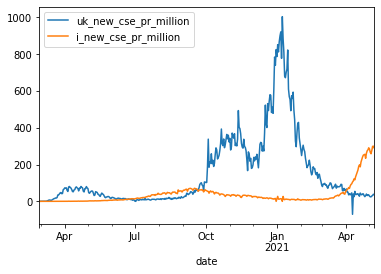

In [435]:
compare.plot(x="date", y=["uk_new_cse_pr_million", "i_new_cse_pr_million" ])

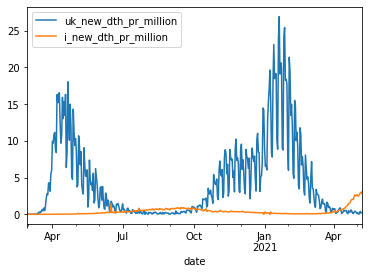

In [436]:
compare.plot(x="date", y=["uk_new_dth_pr_million", "i_new_dth_pr_million" ])

Check for null values

In [437]:
train.isnull().sum()

iso_code                                     0
continent                                 4174
location                                     0
date                                         0
total_cases                               2205
new_cases                                 2207
new_cases_smoothed                        3208
total_deaths                             11925
new_deaths                               11767
new_deaths_smoothed                       3208
total_cases_per_million                   2661
new_cases_per_million                     2663
new_cases_smoothed_per_million            3659
total_deaths_per_million                 12368
new_deaths_per_million                   12210
new_deaths_smoothed_per_million           3659
reproduction_rate                        16636
icu_patients                             77842
icu_patients_per_million                 77842
hosp_patients                            75673
hosp_patients_per_million                75673
weekly_icu_ad

Impute missing values

In [438]:
train = train.drop(['date'], axis=1)

In [439]:
train.dtypes[train.dtypes != 'int64'][train.dtypes != 'float64']

iso_code       object
continent      object
location       object
tests_units    object
date_num       object
dtype: object

Impute null values in categorical columns

In [440]:
train['iso_code'] = train['iso_code'].fillna('Not Listed')
train['continent'] = train['continent'].fillna('Not Listed')
train['location'] = train['location'].fillna('Not Listed')
train['tests_units'] = train['tests_units'].fillna('Not Listed')

Impute numeric columns with 0

In [441]:
train.fillna(0,inplace=True)

Ordinal encoder

In [442]:
#ordinal encoder
from sklearn import preprocessing
from sklearn.preprocessing import OrdinalEncoder

enc = OrdinalEncoder()

train.iso_code = enc.fit_transform(train.iso_code.values.reshape(-1,1))
train.continent = enc.fit_transform(train.continent.values.reshape(-1,1))
train.location = enc.fit_transform(train.location.values.reshape(-1,1))
train.tests_units = enc.fit_transform(train.tests_units.values.reshape(-1,1))

Define X and y

In [443]:
iso_code = train.iso_code

y = train[['new_deaths']]
X = train.drop(['iso_code', 'new_deaths', 'total_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths_smoothed', 'total_cases_per_million', 
                 'new_cases_per_million', 'new_cases_smoothed_per_million', 'total_deaths_per_million', 'new_deaths_per_million', 
                 'new_deaths_smoothed_per_million'], axis=1)

Standard Scaler

In [444]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = scaler.fit_transform(X)

In [445]:
y

,new_deaths
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
86665,3.0
86666,1.0
86667,0.0
86668,1.0


In [446]:
X

array([[-0.47434851, -1.71722926, -0.15701875, ..., -0.26114355,
        -0.59527469,  0.9343568 ],
       [-0.47434851, -1.71722926, -0.15704599, ..., -0.26114355,
        -0.59527469,  1.04729559],
       [-0.47434851, -1.71722926, -0.15704599, ..., -0.26114355,
        -0.59527469,  1.16023438],
       ...,
       [-1.07069005,  1.70719236, -0.15622868, ..., -0.45007501,
        -0.35791947, -1.20809198],
       [-1.07069005,  1.70719236, -0.155929  , ..., -0.45007501,
        -0.35791947, -1.09515319],
       [-1.07069005,  1.70719236, -0.15690977, ..., -0.45007501,
        -0.35791947, -0.9822144 ]])

Split training file up for training and validation

In [447]:
#split train set for testing
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.10, random_state=1, shuffle=True)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((78003, 47), (8667, 47), (78003, 1), (8667, 1))

Select model

In [448]:
from sklearn.experimental import enable_hist_gradient_boosting 
from sklearn.ensemble import HistGradientBoostingRegressor

model = HistGradientBoostingRegressor(max_iter=2000, random_state=1).fit(X_train, y_train)
print(model.score(X_train, y_train))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9915640708654324


Predict on validation set

In [449]:
from sklearn.metrics import r2_score

y_pred = model.predict(X_val)
y_pred = y_pred.astype(int)
y_pred[y_pred < 0] = 0
print(model.score(X_val, y_val)), print(r2_score(y_pred, model.predict(X_val)))

0.9395994645782729
0.9999442447007151


(None, None)

In [450]:
y_val

,new_deaths
27359,0.0
49479,0.0
20780,0.0
61293,11.0
76387,10.0
...,...
41129,3.0
81117,98.0
34330,6.0
31995,0.0


In [451]:
y_train.values

array([[ 0.],
       [ 0.],
       [18.],
       ...,
       [ 0.],
       [ 0.],
       [ 0.]])

In [452]:
y_pred

array([ 0,  0,  0, ..., 17,  0, 49])

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


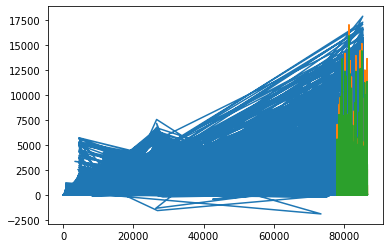

In [453]:
# plot predictions and expected results
from matplotlib import pyplot

pyplot.plot(y_train)
pyplot.plot([None for i in y_train.values] + [x for x in y_val.values])
pyplot.plot([None for i in y_train.values] + [x for x in y_pred.astype(int)])
pyplot.show()

Put predictions in dataframe

In [454]:
df_val=pd.DataFrame({'actual_deaths': y_val.values.ravel(), 'predicted_deaths':y_pred.astype(int)})
df_val.reset_index(drop=True, inplace=True)
df_val

,actual_deaths,predicted_deaths
0,0.0,0
1,0.0,0
2,0.0,0
3,11.0,6
4,10.0,4
...,...,...
8662,3.0,3
8663,98.0,164
8664,6.0,17
8665,0.0,0


Create test dataset

In [455]:
test = last_date.copy()
test.date = today
test

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
438,AFG,Asia,Afghanistan,2021-05-08,61455.0,293.0,244.286,2673.0,9.0,6.857,1578.670,7.527,6.275,68.665,0.231,0.176,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.892834e+07,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.500,64.83,0.511,07052021
888,OWID_AFR,NaN,Africa,2021-05-08,4616997.0,8898.0,8471.143,123905.0,289.0,303.000,3443.983,6.637,6.319,92.425,0.216,0.226,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.974450e+07,13691299.0,5145124.0,163880.0,170468.0,1.47,1.02,0.38,127.0,NaN,1.340598e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,07052021
1326,ALB,Europe,Albania,2021-05-08,131577.0,67.0,70.286,2408.0,2.0,2.000,45721.384,23.282,24.423,836.750,0.695,0.695,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.856930e+05,NaN,NaN,13467.0,15541.0,20.35,NaN,NaN,5400.0,NaN,2.877800e+06,104.871,38.0,13.188,8.643,11803.431,1.1,304.195,10.08,7.100,51.200,NaN,2.890,78.57,0.795,07052021
1764,DZA,Africa,Algeria,2021-05-08,123692.0,219.0,226.286,3315.0,8.0,8.857,2820.731,4.994,5.160,75.597,0.182,0.202,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.385104e+07,17.348,29.1,6.211,3.857,13913.839,0.5,278.364,6.73,0.700,30.400,83.741,1.900,76.88,0.748,07052021
2196,AND,Europe,Andorra,2021-05-08,13390.0,27.0,22.571,127.0,0.0,0.286,173299.683,349.447,292.130,1643.694,0.000,3.698,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.726500e+04,163.755,NaN,NaN,NaN,NaN,NaN,109.135,7.97,29.000,37.800,NaN,NaN,83.73,0.868,07052021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84974,VNM,Asia,Vietnam,2021-05-08,3137.0,47.0,29.857,35.0,0.0,0.000,32.228,0.483,0.307,0.360,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.733858e+07,308.127,32.6,7.150,4.718,6171.884,2.0,245.465,6.00,1.000,45.900,85.847,2.600,75.40,0.704,07052021
85446,OWID_WRL,NaN,World,2021-05-08,156901680.0,831324.0,786028.571,3269856.0,13819.0,12827.714,20129.023,106.651,100.840,419.492,1.773,1.646,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.263381e+09,640353186.0,305302547.0,23324366.0,17778276.0,16.21,8.22,3.92,2281.0,NaN,7.794799e+09,58.045,30.9,8.696,5.355,15469.207,10.0,233.070,8.51,6.434,34.635,60.130,2.705,72.58,0.737,07052021
85839,YEM,Asia,Yemen,2021-05-08,6446.0,20.0,18.429,1269.0,4.0,6.143,216.120,0.671,0.618,42.547,0.134,0.206,NaN,NaN,NaN,NaN,NaN,NaN,N

Convert date to number

In [456]:
import datetime 

test['date'] = pd.to_datetime(test['date'], errors='coerce')

test['date_num'] = test['date'].dt.strftime('%d%m%Y')
test

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
438,AFG,Asia,Afghanistan,2021-05-08,61455.0,293.0,244.286,2673.0,9.0,6.857,1578.670,7.527,6.275,68.665,0.231,0.176,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.892834e+07,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.500,64.83,0.511,08052021
888,OWID_AFR,NaN,Africa,2021-05-08,4616997.0,8898.0,8471.143,123905.0,289.0,303.000,3443.983,6.637,6.319,92.425,0.216,0.226,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.974450e+07,13691299.0,5145124.0,163880.0,170468.0,1.47,1.02,0.38,127.0,NaN,1.340598e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,08052021
1326,ALB,Europe,Albania,2021-05-08,131577.0,67.0,70.286,2408.0,2.0,2.000,45721.384,23.282,24.423,836.750,0.695,0.695,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.856930e+05,NaN,NaN,13467.0,15541.0,20.35,NaN,NaN,5400.0,NaN,2.877800e+06,104.871,38.0,13.188,8.643,11803.431,1.1,304.195,10.08,7.100,51.200,NaN,2.890,78.57,0.795,08052021
1764,DZA,Africa,Algeria,2021-05-08,123692.0,219.0,226.286,3315.0,8.0,8.857,2820.731,4.994,5.160,75.597,0.182,0.202,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.385104e+07,17.348,29.1,6.211,3.857,13913.839,0.5,278.364,6.73,0.700,30.400,83.741,1.900,76.88,0.748,08052021
2196,AND,Europe,Andorra,2021-05-08,13390.0,27.0,22.571,127.0,0.0,0.286,173299.683,349.447,292.130,1643.694,0.000,3.698,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.726500e+04,163.755,NaN,NaN,NaN,NaN,NaN,109.135,7.97,29.000,37.800,NaN,NaN,83.73,0.868,08052021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84974,VNM,Asia,Vietnam,2021-05-08,3137.0,47.0,29.857,35.0,0.0,0.000,32.228,0.483,0.307,0.360,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.733858e+07,308.127,32.6,7.150,4.718,6171.884,2.0,245.465,6.00,1.000,45.900,85.847,2.600,75.40,0.704,08052021
85446,OWID_WRL,NaN,World,2021-05-08,156901680.0,831324.0,786028.571,3269856.0,13819.0,12827.714,20129.023,106.651,100.840,419.492,1.773,1.646,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.263381e+09,640353186.0,305302547.0,23324366.0,17778276.0,16.21,8.22,3.92,2281.0,NaN,7.794799e+09,58.045,30.9,8.696,5.355,15469.207,10.0,233.070,8.51,6.434,34.635,60.130,2.705,72.58,0.737,08052021
85839,YEM,Asia,Yemen,2021-05-08,6446.0,20.0,18.429,1269.0,4.0,6.143,216.120,0.671,0.618,42.547,0.134,0.206,NaN,NaN,NaN,NaN,NaN,NaN,N

Check for null values

In [457]:
test.isnull().sum()

iso_code                                   0
continent                                  9
location                                   0
date                                       0
total_cases                                6
new_cases                                  6
new_cases_smoothed                         6
total_deaths                              14
new_deaths                                14
new_deaths_smoothed                        6
total_cases_per_million                    7
new_cases_per_million                      7
new_cases_smoothed_per_million             7
total_deaths_per_million                  15
new_deaths_per_million                    15
new_deaths_smoothed_per_million            7
reproduction_rate                        205
icu_patients                             204
icu_patients_per_million                 204
hosp_patients                            204
hosp_patients_per_million                204
weekly_icu_admissions                    205
weekly_icu

Impute missing values

In [458]:
predict_date = test.date

test = test.drop(['date'], axis=1)

In [459]:
test.dtypes[test.dtypes != 'int64'][test.dtypes != 'float64']

iso_code       object
continent      object
location       object
tests_units    object
date_num       object
dtype: object

Impute categorical values

In [460]:
test['iso_code'] = test['iso_code'].fillna('Not Listed')
test['continent'] = test['continent'].fillna('Not Listed')
test['location'] = test['location'].fillna('Not Listed')
test['tests_units'] = test['tests_units'].fillna('Not Listed')

Impute numeric values with zero

In [461]:
test.fillna(0,inplace=True)

In [462]:
test

,iso_code,continent,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
438,AFG,Asia,Afghanistan,61455.0,293.0,244.286,2673.0,9.0,6.857,1578.670,7.527,6.275,68.665,0.231,0.176,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Not Listed,0.000000e+00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,3.892834e+07,54.422,18.6,2.581,1.337,1803.987,0.0,597.029,9.59,0.000,0.000,37.746,0.500,64.83,0.511,08052021
888,OWID_AFR,Not Listed,Africa,4616997.0,8898.0,8471.143,123905.0,289.0,303.000,3443.983,6.637,6.319,92.425,0.216,0.226,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Not Listed,1.974450e+07,13691299.0,5145124.0,163880.0,170468.0,1.47,1.02,0.38,127.0,0.0,1.340598e+09,0.000,0.0,0.000,0.000,0.000,0.0,0.000,0.00,0.000,0.000,0.000,0.000,0.00,0.000,08052021
1326,ALB,Europe,Albania,131577.0,67.0,70.286,2408.0,2.0,2.000,45721.384,23.282,24.423,836.750,0.695,0.695,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Not Listed,5.856930e+05,0.0,0.0,13467.0,15541.0,20.35,0.00,0.00,5400.0,0.0,2.877800e+06,104.871,38.0,13.188,8.643,11803.431,1.1,304.195,10.08,7.100,51.200,0.000,2.890,78.57,0.795,08052021
1764,DZA,Africa,Algeria,123692.0,219.0,226.286,3315.0,8.0,8.857,2820.731,4.994,5.160,75.597,0.182,0.202,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Not Listed,0.000000e+00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,4.385104e+07,17.348,29.1,6.211,3.857,13913.839,0.5,278.364,6.73,0.700,30.400,83.741,1.900,76.88,0.748,08052021
2196,AND,Europe,Andorra,13390.0,27.0,22.571,127.0,0.0,0.286,173299.683,349.447,292.130,1643.694,0.000,3.698,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Not Listed,0.000000e+00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,7.726500e+04,163.755,0.0,0.000,0.000,0.000,0.0,109.135,7.97,29.000,37.800,0.000,0.000,83.73,0.868,08052021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84974,VNM,Asia,Vietnam,3137.0,47.0,29.857,35.0,0.0,0.000,32.228,0.483,0.307,0.360,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Not Listed,0.000000e+00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,9.733858e+07,308.127,32.6,7.150,4.718,6171.884,2.0,245.465,6.00,1.000,45.900,85.847,2.600,75.40,0.704,08052021
85446,OWID_WRL,Not Listed,World,156901680.0,831324.0,786028.571,3269856.0,13819.0,12827.714,20129.023,106.651,100.840,419.492,1.773,1.646,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Not Listed,1.263381e+09,640353186.0,305302547.0,23324366.0,17778276.0,16.21,8.22,3.92,2281.0,0.0,7.794799e+09,58.045,30.9,8.696,5.355,15469.207,10.0,233.070,8.51,6.434,34.635,60.130,2.705,72.58,0.737,08052021
85839,YEM,Asia,Yemen,6446.0,20.0,18.429,1269.0,4.0,6.143,216.120,0.

Ordinal encoder

In [463]:
test_country = test.location
test_country

438      Afghanistan
888           Africa
1326         Albania
1764         Algeria
2196         Andorra
            ...     
84974        Vietnam
85446          World
85839          Yemen
86255         Zambia
86669       Zimbabwe
Name: location, Length: 205, dtype: object

In [464]:
test.iso_code = enc.fit_transform(test.iso_code.values.reshape(-1,1))
test.continent = enc.fit_transform(test.continent.values.reshape(-1,1))
test.location = enc.fit_transform(test.location.values.reshape(-1,1))
test.tests_units = enc.fit_transform(test.tests_units.values.reshape(-1,1))

Define X_test

In [465]:
iso_code = test.iso_code

X_test = test.drop(['iso_code', 'total_cases', 'new_deaths','new_cases_smoothed', 'total_deaths', 'new_deaths_smoothed', 'total_cases_per_million', 
                 'new_cases_per_million', 'new_cases_smoothed_per_million', 'total_deaths_per_million', 'new_deaths_per_million', 
                 'new_deaths_smoothed_per_million'], axis=1)

Standard scaler

In [466]:
X_test = scaler.transform(X_test)

In [467]:
X_test

array([[-0.47434851, -1.71722926, -0.14906358, ..., -0.26114355,
        -0.59527469, -0.8692756 ],
       [ 1.31467609, -1.7015209 ,  0.08536884, ..., -3.92833705,
        -2.61675003, -0.8692756 ],
       [ 0.12199302, -1.68581254, -0.15522066, ...,  0.51607746,
         0.52820671, -0.8692756 ],
       ...,
       [-0.47434851,  1.45585867, -0.15650112, ..., -0.18817302,
        -0.75746743, -0.8692756 ],
       [-1.07069005,  1.47156702, -0.15546586, ..., -0.31431588,
        -0.3064925 , -0.8692756 ],
       [-1.07069005,  1.48727538, -0.15690977, ..., -0.45007501,
        -0.35791947, -0.8692756 ]])

Predict on test set

In [468]:

prediction = model.predict(X_test)
prediction = prediction.astype(int)
prediction[prediction < 0] = 0
prediction.shape

(205,)

Put Predictions in dataframe

In [469]:
df_pred=pd.DataFrame({'country': test_country, 'predicted_date': predict_date, 'predicted_deaths':prediction.astype(int)})
df_pred.reset_index(drop=True, inplace=True)
df_pred

,country,predicted_date,predicted_deaths
0,Afghanistan,2021-05-08,10
1,Africa,2021-05-08,403
2,Albania,2021-05-08,0
3,Algeria,2021-05-08,8
4,Andorra,2021-05-08,1
...,...,...,...
200,Vietnam,2021-05-08,0
201,World,2021-05-08,5546
202,Yemen,2021-05-08,0
203,Zambia,2021-05-08,0
